<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
#import re
from tabulate import tabulate
import matplotlib.pyplot as plt
#import urllib.request
import copy
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [2]:
# загрузим данные
# df = pd.read_excel('C:/Users/Ксения/Desktop/Data Science/Клиентская аналитика/electronika_03_04.xlsx')
df_init = pd.read_excel('https://drive.google.com/u/0/uc?id=1HpXfFi7oOFtOsJOnlKkkoIFzPEMyMVjg&export=download', header=0)
df=copy.deepcopy(df_init)   

In [3]:
# Выведем строки датасета
df

,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID
0,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,0.0,39519.00,1.0,1157790.0,Доставка до точки выдачи,Доставка,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,35554.0
1,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,0.0,39519.00,3.0,1138110.0,"""Гарант +"" - Договор страхования, обеспечивающ...",Гарант +,1.0,3520.0,0.0,3520.0,NaN,NaN,NaN,Услуги/Страхование техники/Гарант +/,13.0,16686.0
2,1303000509_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,08:46:30.000,201603,2016-03-30 09:31:57.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3066,39519.00,0.0,39519.00,2.0,1180135.0,Телевизор LED Samsung UE-40J6200AU Smart,Smart телевизоры,1.0,35999.0,0.0,35999.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/Smart теле...",13.0,95567.0
3,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Курьерская,Наличные,Москва,Москва,2189,96665.66,0.0,96665.66,1.0,1104611.0,"Доставка ""Стандарт"" зона 0",Доставка,1.0,490.0,0.0,490.0,NaN,NaN,NaN,Услуги/Доставка/,13.0,29329.0
4,1303000510_TT,55666668105117_iu29@yandex.ru,55485656-57565656575275,Онлайн-Резерв.,2016-03-30,11:22:51.000,201603,2016-03-30 11:24:32.000,2016-04-06 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Курьерская,Наличные,Москва,Москва,2189,96665.66,0.0,96665.66,4.0,1087811.0,"Крепление LCD-телевизора на стену, подключение...",Установка и настройка ТВ,2.0,3990.0,0.0,7980.0,NaN,NaN,NaN,Установка и настройка техники/Установка и наст...,13.0,2748.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357031,75511562_BX,0,0,Терминал,2016-03-18,12:56:40.000,201603,2016-03-18 15:56:15.000,2016-03-18 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Тестовый заказ,NaN,Самовывоз,Наличные,Москва,Москва,3305,1.00,0.0,1.00,2.0,1177731.0,Телевизор LED Samsung UE-105S9WAT Smart,3D телевизоры,1.0,1.0,0.0,1.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/3D телевиз...",11.0,92697.0
357032,75511563_BX,0,0,Терминал,2016-03-15,16:43:15.000,201603,2016-03-20 09:20:45.000,2016-03-22 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Москва,Москва,3305,26990.00,0.0,26990.00,1.0,1157790.0,Доставка до точки выдачи,Доставка,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Услуги/Доставка/,11.0,35554.0
357033,75511563_BX,0,0,Терминал,2016-03-15,16:43:15.000,201603,2016-03-20 09:20:45.000,2016-03-22 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Москва,Москва,3305,26990.00,0.0,26990.00,2.0,1187387.0,LED Телевизор Philips 40PFT4100/60,LED телевизоры,1.0,26990.0,0.0,26990.0,Philips,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",11.0,111803.0
357034,75511567_BX,0,0,Терминал,2016-03-15,16:47:21.000,201603,2016-03-20 09:20:46.000,2016-03-22 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Н

In [4]:
#Удалим дубликаты из датасета
df = df.drop_duplicates()

In [5]:
#Для каждого стоблца найдем количество уникальных значений, NaNs и нулевых и их долю. Также, выведем тип данных в столбце.
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0),  df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

In [6]:
data = []
for column in df:
    data.append([column] + columnValues(df[column]))

In [7]:
print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column       |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type      |
|--------------+----------------+---------------+--------------+-------------+----------------|
| Order_ID     |         166794 |             0 |            0 |         0   | object         |
| Email_new    |          99284 |         61511 |            0 |         0   | object         |
| Phone_new    |         123135 |          7565 |            0 |         0   | object         |
| Source       |              4 |             0 |            0 |         0   | object         |
| OrderDate    |             61 |             0 |            0 |         0   | datetime64[ns] |
| время        |          58549 |             0 |            0 |         0   | object         |
| месяц        |              2 |             0 |            0 |         0   | int64          |
| ChangeDate   |         155189 |             0 |            0 |         0   | object         |
| DeliveryDate |            100 |       

In [8]:
# Для идентификации клиента подходят 2 столбца "Email_new" и "Phone_new". В данных столбцах не должно быть пропусков. Столбец "Phone_new" содержит значитиельно меньше пропусков данных, чем столбец "Email_new". Поэтому возьмем столбец "Phone_new" для идентификации клиентов.
# Столбец "Email_new" удалим 
df = df.drop(columns=['Email_new'])

In [9]:
# Много столбцов имеют тип данных "object", который обычно присваивается, когда параметр имеет смешанный тип данных: numbers и strings
# Необходимо проверить типы данных в столбцах. Для этого для каждого столбца выводим количество различных типов данных.
# Важно чтобы в одном столбце был один тип данных
for column in df:
    print(df[column].apply(type).value_counts().to_dict(), column)

{<class 'str'>: 357026} Order_ID
{<class 'str'>: 349461, <class 'int'>: 7565} Phone_new
{<class 'str'>: 357026} Source
{<class 'pandas._libs.tslibs.timestamps.Timestamp'>: 357026} OrderDate
{<class 'str'>: 357026} время
{<class 'int'>: 357026} месяц
{<class 'str'>: 357026} ChangeDate
{<class 'str'>: 357026} DeliveryDate
{<class 'str'>: 357026} PaymentDate
{<class 'str'>: 357026} Status
{<class 'int'>: 357026} Status_ID
{<class 'int'>: 357026} OneClick
{<class 'float'>: 230861, <class 'str'>: 126165} CancelReason
{<class 'float'>: 261490, <class 'str'>: 95536} Actions
{<class 'str'>: 348741, <class 'float'>: 8285} DeliveryType
{<class 'str'>: 357026} PaymentType
{<class 'str'>: 357024, <class 'float'>: 2} Region
{<class 'str'>: 355395, <class 'float'>: 1631} Area
{<class 'int'>: 357026} Store_ID
{<class 'float'>: 357026} FullSum
{<class 'float'>: 357026} Discount
{<class 'float'>: 357026} IM_Rozn_Sum
{<class 'float'>: 357026} Row_ID
{<class 'float'>: 357026} Articul
{<class 'str'>: 3569

In [10]:
# Видим, что некоторые столбцы содержат в себе неколько типов данных – это плохо. Поэтому, оставим только один тип – переведем в нужный тип / удалим артефакты. Знаем, что NaN это float, его не трогаем.
# Вручную проверим столбцы на количество Nan

df['CancelReason'].isna().sum()

230861

In [11]:
df['Actions'].isna().sum()

261490

In [12]:
df['DeliveryType'].isna().sum()

8285

In [13]:
df['Region'].isna().sum()

2

In [14]:
df['Area'].isna().sum()

1631

In [15]:
df['Nom_Name'].isna().sum()

48

In [16]:
df['NomGroup'].isna().sum()

10

In [17]:
df['Brand'].isna().sum()

166131

In [18]:
df['TN'].isna().sum()

166059

In [19]:
df['TK'].isna().sum()

166059

In [20]:
df['NomFullPath'].isna().sum()

10

In [21]:
# Уберем неопределенности в данных и удалим строки с пропусками номеров телефонов - важные данные, которые нельзя восстановить
(df['Phone_new'] == 0).sum(axis=0)

7565

In [22]:
df = df.drop(df[df["Phone_new"] == 0].index)

In [120]:
# Исследуем показатель "Status"
df['Status'].value_counts()

Выдан клиенту                   120221
Отменен                          59479
Отказ на месте                    1586
Доставлен частично в магазин       408
Доставлен в магазин                384
Согласован                         311
В обработке                         50
Передан на доставку                 20
Собран                              10
Подтвержден на доставку             10
Собран частично                      4
Дубль заказа                         3
Ожидает осмотра                      1
Не собран                            1
Name: Status, dtype: int64

<AxesSubplot:title={'center':'Статус заказа'}, ylabel='Status'>

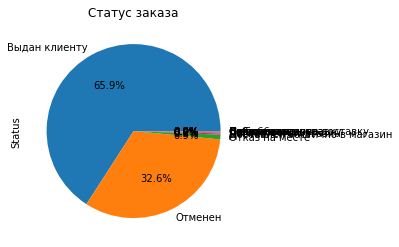

In [128]:
df['Status'].value_counts().plot(kind='pie', title='Статус заказа', autopct='%1.1f%%')

<AxesSubplot:title={'center':'Статус заказа'}>

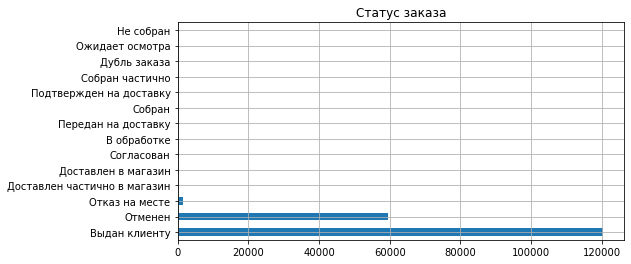

In [130]:
df['Status'].value_counts().plot(kind='barh', title='Статус заказа', grid=True, figsize=( 8 , 4 ))

In [131]:
# Исследуем показатель "Oneclick"
df['OneClick'].value_counts()

0    168115
1     14373
Name: OneClick, dtype: int64

<AxesSubplot:title={'center':'Быстрый заказ'}, ylabel='OneClick'>

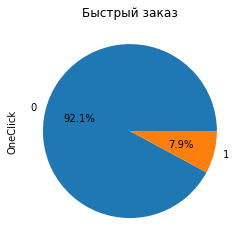

In [133]:
df['OneClick'].value_counts().plot(kind='pie', title='Быстрый заказ', autopct='%1.1f%%')

In [ ]:
# Лишь около 8% заказов были совершены с помощью быстрого заказа

In [23]:
# Исследуем показатель "CancelReason"
df['CancelReason'].value_counts()

Клиент не пришел за заказом      47209
Клиент передумал                  9957
Нет связи с клиентом              7970
Другое (указать в примечании)     7776
Нет товара                        6309
                                 ...  
Качество товара                     69
Ошибка поставки                     21
Негативные отзывы о товара          13
Негативные отзывы о компании         8
Контент                              5
Name: CancelReason, Length: 34, dtype: int64

<AxesSubplot:title={'center':'Причины отмены'}>

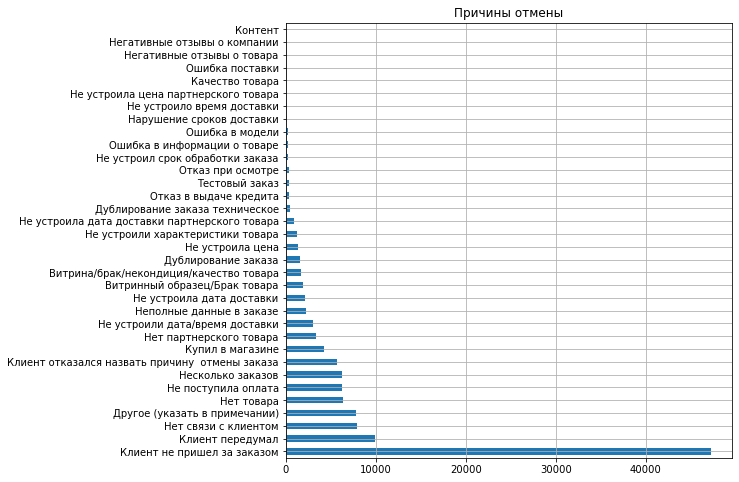

In [24]:
df['CancelReason'].value_counts().plot(kind='barh', title='Причины отмены', grid=True, figsize=( 8 , 8 ))

In [25]:
# Причины "Дублирование заказа", "Дублирование заказа техническое", "Тестовый заказ" и "Несколько заказов" искажают анализ, посмотрим сколько их:
df[(df["CancelReason"] == 'Дублирование заказа')|(df["CancelReason"] == 'Дублирование заказа техническое')|(df["CancelReason"] == 'Тестовый заказ')|(df["CancelReason"] == 'Несколько заказов')].count()['CancelReason']

8588

In [26]:
# Причины "Дублирование заказа", "Дублирование заказа техническое", "Тестовый заказ" и "Несколько заказов" искажают анализ, поэтому удалим эти строки

df = df.drop(df[(df["CancelReason"] == 'Дублирование заказа')|(df["CancelReason"] == 'Дублирование заказа техническое')|(df["CancelReason"] == 'Тестовый заказ')|(df["CancelReason"] == 'Несколько заказов')].index)

In [134]:
# Исследуем показатель "Delivery type"
df['DeliveryType'].value_counts()

Самовывоз     140164
Курьерская     39093
Name: DeliveryType, dtype: int64

<AxesSubplot:title={'center':'Тип доставки'}, ylabel='DeliveryType'>

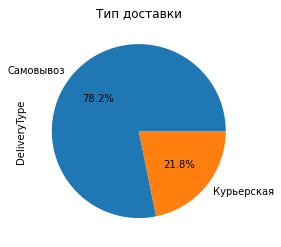

In [135]:
df['DeliveryType'].value_counts().plot(kind='pie', title='Тип доставки', autopct='%1.1f%%')

In [28]:
# Удалим записи с доставкой и услугами
# Выявим категории, которые нужно удалить:

In [29]:
# По логике доставка и другие услуги должны иметь нулевые значения в столбцах TN и TK. Исследуем и выявим все категории, относящиеся к доставке и другим услугам:
df['NomFullPath'][df['TN'].isna()].value_counts()

Услуги/Доставка/                                                                                   156586
Услуги/Страхование техники/Сервис +/                                                                  681
Услуги/                                                                                               465
Установка и настройка техники/Установка бытовой техники/Стиральные и посудомоечные машины/            227
Установка и настройка техники/Установка бытовой техники/Электрические плиты и СВЧ/                    140
Установка и настройка техники/Установка бытовой техники/Холодильники/                                  76
Номенклатура к привязке/                                                                               36
Установка и настройка техники/Установка встраиваемой техники/Электрические плиты и СВЧ/                35
Установка и настройка техники/Установка встраиваемой техники/Стиральные и посудомоечные машины/        28
Установка и настройка техники/Установка и наст

In [27]:
df[(df["NomFullPath"] == 'Услуги/Доставка/')|(df["NomFullPath"] == 'Услуги/Страхование техники/Сервис +/')|(df["NomFullPath"] == 'Услуги/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка бытовой техники/Стиральные и посудомоечные машины/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка бытовой техники/Электрические плиты и СВЧ/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка бытовой техники/Холодильники/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка встраиваемой техники/Электрические плиты и СВЧ/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка встраиваемой техники/Стиральные и посудомоечные машины/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка и настройка ТВ/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка бытовой техники/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка кондиционеров/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка бытовой техники/Накопительные водонагреватели/')|(df["NomFullPath"] == 'Услуги/Гарантийные талоны/')|(df["NomFullPath"] == 'Услуги/Страхование техники/Гарант +/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка встраиваемой техники/Холодильники/')|(df["NomFullPath"] == 'Услуги/Страхование техники/Защита МАКС/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка и настройка программного обеспечения/')].count()['NomFullPath']

158333

In [28]:
df = df.drop(df[(df["NomFullPath"] == 'Услуги/Доставка/')|(df["NomFullPath"] == 'Услуги/Страхование техники/Сервис +/')|(df["NomFullPath"] == 'Услуги/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка бытовой техники/Стиральные и посудомоечные машины/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка бытовой техники/Электрические плиты и СВЧ/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка бытовой техники/Холодильники/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка встраиваемой техники/Электрические плиты и СВЧ/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка встраиваемой техники/Стиральные и посудомоечные машины/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка и настройка ТВ/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка бытовой техники/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка кондиционеров/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка бытовой техники/Накопительные водонагреватели/')|(df["NomFullPath"] == 'Услуги/Гарантийные талоны/')|(df["NomFullPath"] == 'Услуги/Страхование техники/Гарант +/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка встраиваемой техники/Холодильники/')|(df["NomFullPath"] == 'Услуги/Страхование техники/Защита МАКС/')|(df["NomFullPath"] == 'Установка и настройка техники/Установка и настройка программного обеспечения/')].index)

In [31]:
# Проверим, все ли удалили
df['NomFullPath'].value_counts()

Телефоны и связь/Смартфоны/                                                                                                                           8082
Техника для кухни/Крупная бытовая техника/Холодильники/                                                                                               6285
Техника для дома/Стиральные и сушильные машины/Стиральные машины/                                                                                     5471
Товары для спорта и отдыха/Велосипеды и аксессуары/Велосипеды/                                                                                        4268
Телевизоры, аудио, видео/Телевизоры/LED телевизоры/                                                                                                   3937
Техника для кухни/Приготовление пищи/Чайники и термопоты/Чайники электрические/                                                                       3761
Встраиваемая техника/Вытяжки/                                         

In [29]:
data = []
for column in df:
    data.append([column] + columnValues(df[column]))

In [30]:
# Посмотрим на датасет после предварительной чистки
print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column       |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type      |
|--------------+----------------+---------------+--------------+-------------+----------------|
| Order_ID     |         159157 |             0 |            0 |         0   | object         |
| Phone_new    |         122788 |             0 |            0 |         0   | object         |
| Source       |              4 |             0 |            0 |         0   | object         |
| OrderDate    |             61 |             0 |            0 |         0   | datetime64[ns] |
| время        |          57932 |             0 |            0 |         0   | object         |
| месяц        |              2 |             0 |            0 |         0   | int64          |
| ChangeDate   |         148123 |             0 |            0 |         0   | object         |
| DeliveryDate |            100 |             0 |            0 |         0   | object         |
| PaymentDate  |         102293 |       

In [31]:
# Модифицируем показатели Region Area, заменив их на более широкий показатель. Дл этого загрузим датасет, в котором хранится информация о регионах и входящих в них областях и городах.
df_area = pd.read_excel('https://drive.google.com/u/1/uc?id=1rR1TOUalW41k-Z3lp2MFcH6m3nA6NjCx&export=download', header=0)

In [32]:
df_area

,Регион,Город
0,CENTRAL,Алексеевка
1,CENTRAL,Белгород
2,CENTRAL,Валуйки
3,CENTRAL,Губкин
4,CENTRAL,Старый Оскол
...,...,...
652,URAL,Надым
653,URAL,Новый Уренгой
654,URAL,Ноябрьск
655,URAL,Салехард


In [33]:
# удалим дубликаты
df_area = df_area.drop_duplicates()

In [34]:
# 1 значение в столбце "Region" пропущено. Посмотрим:
df[df['Region'].isna()]

,Order_ID,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID
172136,5610706_BX,55574851-555457564953795,Онлайн-Резерв.,2016-03-29,14:40:57.000,201603,2016-03-29 14:58:34.000,2016-04-05 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,1,Неполные данные в заказе,NaN,NaN,Наличные,NaN,Москва,0,51949.0,0.0,51949.0,2.0,1217021.0,Проектор Acer K137i DLP белый,Видеопроекторы и экраны,1.0,51949.0,0.0,51949.0,Acer,ТВ-Аудио,Hi-Fi компоненты,"Телевизоры, аудио, видео/Видеотехника/Видеопро...",13.0,217332.0


In [35]:
# Пропущены значения "Москва". Допишем:
for i in df[df['Region'].isna()].index:
    df.loc[i, 'Region']='Москва'

In [36]:
# Присоединим столбец "Регион" к основной таблице
df=pd.merge(df, df_area, left_on='Region', right_on='Город', how='left')

In [37]:
df

,Order_ID,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,Регион,Город
0,1303000511_TT,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:46:45.000,201603,2016-03-05 09:16:49.000,2016-03-01 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Клиент не пришел за заказом,NaN,Самовывоз,Наличные,Москва,Москва,3305,2970.0,0.0,2970.0,2.0,1177293.0,Глад. доска Ника Валенсия НВ1,Гладильные доски,1.0,2970.0,0.0,2970.0,Ника,Товары для дома,Хозтовары,Техника для дома/Техника для ухода за одеждой/...,9.0,90364.0,CENTRAL,Москва
1,1303000513_TT,55575655-50555350534877,Онлайн-Резерв.,2016-03-11,16:06:56.000,201603,2016-03-11 20:11:18.000,2016-03-12 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет связи с клиентом,БесплатнаяДоставкаНаСуммуКорзины,Курьерская,Наличные,Москва,Москва,2789,19990.0,0.0,19990.0,2.0,1190326.0,LED Телевизор Samsung UE-32J4000AK,LED телевизоры,1.0,19990.0,0.0,19990.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",10.0,120757.0,CENTRAL,Москва
2,1303000520_TT,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,2016-03-04 15:09:39.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,КартойПриПолучении,Москва,Москва,3518,2420.0,0.0,2420.0,2.0,1172127.0,Картридж HP №950 CN049AE черный,Картриджи струйные,1.0,2420.0,0.0,2420.0,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9.0,76102.0,CENTRAL,Москва
3,1303000521_TT,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,00:02:17.000,201603,2016-03-03 15:03:50.000,2016-03-02 00:00:00.000,2016-03-02 00:36:12.000,Выдан клиенту,14,0,NaN,"БесплатнаяДоставкаНаСуммуКорзины,СкидкаСуммойП...",Курьерская,Наличные,Санкт-Петербург,Ленинградская обл.,2656,8999.0,2000.0,8999.0,2.0,1179175.0,Эл.плита Darina 1B ЕМ341 406 W,Электрические плиты,1.0,10999.0,2000.0,8999.0,Darina,Крупная бытовая техника,Плиты,Техника для кухни/Крупная бытовая техника/Плит...,9.0,93780.0,NORTH,Санкт-Петербург
4,1303000522_TT,55575456-48485254505072,Онлайн-Резерв.,2016-03-01,00:02:26.000,201603,2016-03-02 16:56:42.000,2016-03-04 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет партнерского товара,NaN,Самовывоз,Наличные,Люберцы,Московская обл.,3080,3919.0,0.0,3919.0,2.0,1234632.0,Блендер Polaris PHB 1321L черный,Блендеры,1.0,3919.0,0.0,3919.0,Polaris,Мелкая бытовая техника,Приготовление пищи,Техника для кухни/Обработка продуктов/Блендеры/,9.0,271556.0,CENTRAL,Люберцы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182535,5898089_BX,55574957-51495048515075,Онлайн-Резерв.,2016-04-30,23:51:37.000,201604,2016-05-03 12:55:07.000,2016-05-02 00:00:00.000,2016-05-02 00:10:22.000,Выдан клиенту,14,0,NaN,NaN,Курьерская,Наличные,Москва,Москва,2189,1149.0,0.0,1149.0,2.0,1158853.0,Вент/напол Saturn ST-FN8268,Вентиляторы,1.0,899.0,0.0,899.0,Saturn,Климат,Вентиляторы бытовые,Техника для дома/Климатическая техника/Кондици...,17.0,38755.0,CENTRAL,Москва
182536,5898095_BX,55575452-55554849505278,Онлайн-Резерв.,2016-04-30,23:54:03.000,201604,2016-05-04 19:43:40.000,2016-05-07 00:00:00.000,2016-05-04 19:43:41.000,Выдан клиенту,14,1,NaN,NaN,Самовывоз,Наличные,Серпухов,Московская обл-2,3384,1090.0,0.0,1090.0,2.0,1155686.0,Сумка Case Logic DCB304K черн.,Сумки для зеркальных фотоаппаратов,1.0,1090.0,0.0,1090.0,Case Logic,Аксессуары,Аксессуары для фото/видео,Фото- и видеотехника/Аксессуары для фото и вид...,17.0,31908.0,CENTRAL,Серпухов
182537,5898099_BX,55574948-50554849554878,Онлайн-Резерв.,2016-04-30,23:56:02.000,201604,2016-05-01 11:57:42.000,2016-05-08 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Неполные данные в заказе,БесплатнаяДоставкаНаСуммуКо

In [38]:
# Проверим, все ли значения в столбце Регион заполнены
data = []
for column in df:
    data.append([column] + columnValues(df[column]))

In [39]:
print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column       |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type      |
|--------------+----------------+---------------+--------------+-------------+----------------|
| Order_ID     |         159157 |             0 |            0 |         0   | object         |
| Phone_new    |         122788 |             0 |            0 |         0   | object         |
| Source       |              4 |             0 |            0 |         0   | object         |
| OrderDate    |             61 |             0 |            0 |         0   | datetime64[ns] |
| время        |          57932 |             0 |            0 |         0   | object         |
| месяц        |              2 |             0 |            0 |         0   | int64          |
| ChangeDate   |         148123 |             0 |            0 |         0   | object         |
| DeliveryDate |            100 |             0 |            0 |         0   | object         |
| PaymentDate  |         102293 |       

In [40]:
# Для анализа нам важно знать:
# - Оплатил ли клиент онлайн или оффлайн, поэтому заменим "Наличные", "КартойПриПолучении", "Кредит в магазине" на "оффлайн", а остальное на "онлайн"
df['PaymentType'].value_counts()

Наличные               135347
КартойПриПолучении      28947
Кредит в магазине        7567
RBK Money                6486
Квитанция Сбербанка      3254
Банк Тинькофф             549
PayPal                    390
Name: PaymentType, dtype: int64

In [41]:
df['PaymentType'] = df['PaymentType'].astype(str)
df['PaymentType'] = df['PaymentType'].apply(lambda x: x.replace('Наличные', 'оффлайн'))
df['PaymentType'] = df['PaymentType'].apply(lambda x: x.replace('Кредит в магазине', 'оффлайн'))
df['PaymentType'] = df['PaymentType'].apply(lambda x: x.replace('КартойПриПолучении', 'оффлайн'))
df['PaymentType'] = df['PaymentType'].apply(lambda x: x.replace('RBK Money', 'онлайн'))
df['PaymentType'] = df['PaymentType'].apply(lambda x: x.replace('Квитанция Сбербанка', 'онлайн'))
df['PaymentType'] = df['PaymentType'].apply(lambda x: x.replace('Банк Тинькофф', 'онлайн'))
df['PaymentType'] = df['PaymentType'].apply(lambda x: x.replace('PayPal', 'онлайн'))

<AxesSubplot:title={'center':'Тип оплаты'}, ylabel='PaymentType'>

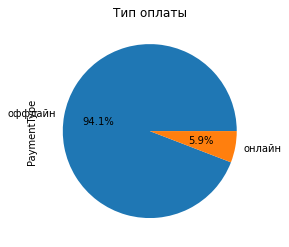

In [42]:
df['PaymentType'].value_counts().plot(kind='pie', title='Тип оплаты', autopct='%1.1f%%')

In [43]:
df['PaymentType'].value_counts()

оффлайн    171861
онлайн      10679
Name: PaymentType, dtype: int64

In [44]:
# Для анализа нам важен флаг наличия скидки, поэтому заменим значения в параметре Discount на 0 и 1, где «0» - без скидки,  «1» - со скидкой
df['Discount'] = df['Discount'].astype(float)
df.loc[(df['Discount'].isna()), 'Discount'] = 0
df.loc[(df['Discount']>0), 'Discount'] = 1

<AxesSubplot:title={'center':'Наличие скидки'}, ylabel='Discount'>

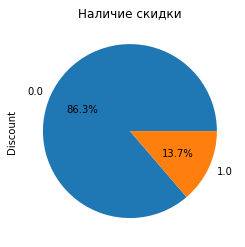

In [45]:
df['Discount'].value_counts().plot(kind='pie', title='Наличие скидки', autopct='%1.1f%%')

In [46]:
df['Discount'].value_counts()

0.0    157513
1.0     25027
Name: Discount, dtype: int64

In [47]:
# В таблице есть записи, RowSum которых равно нулю
df[(df['RowSum'] == 0)]

,Order_ID,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,Регион,Город
168,1862001274_TT,55575054-53555551505772,Онлайн-Резерв.,2016-03-01,08:16:52.000,201603,2016-03-11 09:04:11.000,2016-03-04 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Клиент не пришел за заказом,Подарки,Самовывоз,оффлайн,Иваново,Ивановская обл.,3088,32490.0,1.0,32490.0,2.0,1142013.0,Насадка Kenwood MGX400,Прочее,1.0,8990.0,8990.0,0.0,Kenwood,Мелкая бытовая техника,Приготовление пищи,Техника для кухни/Обработка продуктов/Прочее/,9.0,18658.0,CENTRAL,Иваново
4965,5414175_BX,55575653-48505148565475,Колл-центр,2016-03-02,15:17:40.000,201603,2016-03-10 11:43:24.000,2016-03-10 00:00:00.000,2016-03-10 10:30:51.000,Выдан клиенту,14,0,NaN,СкидкаСуммойПроцентомСЛимитом,Курьерская,оффлайн,Ростов-на-Дону,Ростовская обл.,3483,600.0,0.0,600.0,1.0,1112325.0,Подарочная карта 500 руб с конвертом,Подарочные карты,1.0,0.0,0.0,0.0,Магазин,Услуги,Услуги по пластиковым картам,"Телевизоры, аудио, видео/Игры, софт, развлечен...",9.0,5726.0,SOUTHERN,Ростов-на-Дону
7556,5417270_BX,55574854-535455555155765,Онлайн-Резерв.,2016-03-03,10:55:15.000,201603,2016-03-03 11:45:46.000,2016-03-10 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Санкт-Петербург,Ленинградская обл.,3676,0.0,0.0,0.0,2.0,1169518.0,Внеш/блок Polaris PS-1211Bi,Комплектующие кондиционеров,1.0,0.0,0.0,0.0,Polaris,NaN,NaN,Номенклатура к привязке/Комплектующие кондицио...,9.0,59986.0,NORTH,Санкт-Петербург
7557,5417270_BX,55574854-535455555155765,Онлайн-Резерв.,2016-03-03,10:55:15.000,201603,2016-03-03 11:45:46.000,2016-03-10 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Санкт-Петербург,Ленинградская обл.,3676,0.0,0.0,0.0,3.0,1169519.0,Внут/блок Polaris PS-1211Bi,Комплектующие кондиционеров,1.0,0.0,0.0,0.0,Polaris,NaN,NaN,Номенклатура к привязке/Комплектующие кондицио...,9.0,89983.0,NORTH,Санкт-Петербург
8855,5419217_BX,55574852-49524853515271,Колл-центр,2016-03-03,15:15:13.000,201603,2016-03-21 11:46:40.000,2016-03-11 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет партнерского товара,Подарки,Курьерская,оффлайн,Москва,Москва,9999,2809.0,1.0,0.0,2.0,1223161.0,Отвертка Skil 10-in-1 (2610Z04744),Ручной инструмент,1.0,0.0,0.0,0.0,Skil,Сделай сам,Инструменты,"Для дома, дачи и ремонта/Инструменты/Ручной ин...",9.0,230124.0,CENTRAL,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177411,5881624_BX,55575052-55485750534871,Онлайн-Резерв.,2016-04-28,23:05:51.000,201604,2016-04-29 17:54:53.000,2016-04-28 00:00:00.000,1900-01-01 00:00:00.000,Отказ на месте,24,0,Клиент передумал,Подарки,Самовывоз,оффлайн,Москва,Москва,3048,44999.0,1.0,44999.0,2.0,1133444.0,Контейнер DeLonghi 500GR для кофе,Кофе,1.0,2199.0,2199.0,0.0,DeLonghi,Мелкая бытовая техника,Приготовление пищи,Техника для кухни/Приготовление пищи/Приготовл...,17.0,13388.0,CENTRAL,Москва
177636,5882213_BX,55574851-57555353515573,Онлайн-Резерв.,2016-04-29,07:38:16.000,201604,2016-05-07 09:18:23.000,2016-05-03 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Клиент не пришел за заказом,Подарки,Самовывоз,оффлайн,Липецк,Липецкая обл.,3905,59990.0,1.0,59990.0,2.0,1133444.0,Контейнер DeLonghi 500GR для кофе,Кофе,1.0,2199.0,2199.0,0.0,DeLonghi,Мелкая бытовая техника,Приготовление пищи,Техника для кухни/Приготовление пищи/Приготовл...,17.0,13388.0,CENTRAL,Липецк
178235,5884205_BX,55575054-49575752525770,Онлайн-Резерв.,2016-04-29,11:47:02.000,201604,2016-05-21 14:21:02.000,2016-05-23 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Не поступила оплата,Подарки,Самовывоз,онлайн,Краснодар,Краснодарский край,3431,44999.0,1.0,44999.0,2.0,1133444.0,Конт

In [51]:
# Проанализируем значения TN
df['TN'].value_counts()

Мелкая бытовая техника      37497
Крупная бытовая техника     28704
Цифровая Техника            22053
Сделай сам                  17317
Спорт и активный отдых      16001
Аксессуары                  15803
Детские товары              12930
ТВ-Аудио                    11582
Мебель                       7914
Товары для дома              7832
Климат                       3790
Игры, софт и развлечения      775
Услуги                        182
Автотовары                     79
Элитная техника                 6
Инсталляция                     1
Хобби, досуг                    1
Name: TN, dtype: int64

<AxesSubplot:title={'center':'Товарные направления'}>

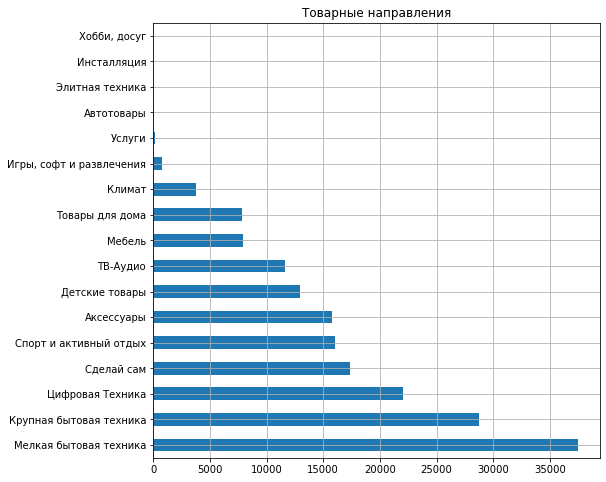

In [52]:
df['TN'].value_counts().plot(kind='barh', title='Товарные направления', grid=True, figsize=( 8 , 8 ))

In [50]:
# Сомнения вызывают категории "Аксессуары", "Услуги", "Инсталляция" и "Хобби, досуг"
#df['TK'][(df['TN']=='Аксессуары')].value_counts()

In [51]:
#df['TK'][(df['TN']=='Услуги')].value_counts()

In [52]:
#df[(df['TN']=='Инсталляция')]

In [53]:
# В этой категории всего лишь одна запись, поэтому удалим ее:
# df=df.drop(df[(df['TN']=='Инсталляция')].index)

In [54]:
#df[(df['TN']=='Хобби, досуг')]

In [55]:
# Пакеты так же исключаем из анализа:
#df=df.drop(df[(df['TN']=='Хобби, досуг')].index)

In [56]:
# Проанализируем группу "Сопутствующие товары". Вывод: группу оставляем
df[(df['NomGroup']=='Сопутствующие товары')]

,Order_ID,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,Регион,Город
4708,5413772_BX,55574850-56555157525274,Онлайн-Резерв.,2016-03-02,14:22:32.000,201603,2016-03-10 11:51:42.000,2016-03-08 00:00:00.000,1900-01-01 00:00:00.000,Отказ на месте,24,0,Клиент передумал,NaN,Самовывоз,оффлайн,Рязань,Рязанская обл.,3860,840.0,0.0,840.0,2.0,1163377.0,Настенные часы Scarlett SC-55I белый,Сопутствующие товары,1.0,840.0,0.0,840.0,Scarlett,Товары для дома,Декор интерьера,Техника для дома/Аксессуары для дома/Сопутству...,9.0,44538.0,CENTRAL,Рязань
4761,5413881_BX,55574851-55495257524978,Онлайн-Резерв.,2016-03-02,14:33:30.000,201603,2016-03-02 15:04:19.000,2016-03-03 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Москва,Москва,3412,840.0,0.0,840.0,2.0,1163377.0,Настенные часы Scarlett SC-55I белый,Сопутствующие товары,1.0,840.0,0.0,840.0,Scarlett,Товары для дома,Декор интерьера,Техника для дома/Аксессуары для дома/Сопутству...,9.0,44538.0,CENTRAL,Москва
22714,5439431_BX,55575055-49544950555274,Онлайн-Резерв.,2016-03-07,09:33:54.000,201603,2016-03-07 15:24:29.000,2016-03-14 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Витринный образец/Брак товара,NaN,Самовывоз,оффлайн,Псков,Псковская обл.,3695,1789.0,0.0,1789.0,2.0,1163375.0,Часы настенные Scarlett SC-45A белый,Сопутствующие товары,2.0,380.0,0.0,760.0,Scarlett,Товары для дома,Декор интерьера,Техника для дома/Аксессуары для дома/Сопутству...,10.0,44532.0,NORTH,Псков
22715,5439431_BX,55575055-49544950555274,Онлайн-Резерв.,2016-03-07,09:33:54.000,201603,2016-03-07 15:24:29.000,2016-03-14 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Витринный образец/Брак товара,NaN,Самовывоз,оффлайн,Псков,Псковская обл.,3695,1789.0,0.0,1789.0,4.0,1165601.0,Часы настенные Scarlett SC-55N,Сопутствующие товары,1.0,499.0,0.0,499.0,Scarlett,Товары для дома,Декор интерьера,Техника для дома/Аксессуары для дома/Сопутству...,10.0,50656.0,NORTH,Псков
22716,5439431_BX,55575055-49544950555274,Онлайн-Резерв.,2016-03-07,09:33:54.000,201603,2016-03-07 15:24:29.000,2016-03-14 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Витринный образец/Брак товара,NaN,Самовывоз,оффлайн,Псков,Псковская обл.,3695,1789.0,0.0,1789.0,3.0,1163376.0,Настенные часы Scarlett SC-55BL черный,Сопутствующие товары,1.0,530.0,0.0,530.0,Scarlett,Товары для дома,Декор интерьера,Техника для дома/Аксессуары для дома/Сопутству...,10.0,44535.0,NORTH,Псков
24102,5442196_BX,55575056-50575449535677,Онлайн-Резерв.,2016-03-07,14:17:18.000,201603,2016-03-14 14:51:56.000,2016-03-10 00:00:00.000,1900-01-01 00:00:00.000,Отказ на месте,24,0,Клиент передумал,NaN,Самовывоз,оффлайн,Гатчина,Ленинградская обл.,3671,2299.0,0.0,2299.0,2.0,1169435.0,Набор лапок Profi Set SM 13-09,Сопутствующие товары,1.0,2299.0,0.0,2299.0,Profi Set,Аксессуары,Аксессуары для бытовой техники,Техника для дома/Аксессуары для дома/Сопутству...,10.0,53485.0,NORTH,Гатчина
24970,5443557_BX,55574850-56555154565571,Онлайн-Резерв.,2016-03-07,16:54:14.000,201603,2016-03-07 17:10:38.000,2016-03-12 00:00:00.000,2016-03-07 17:10:39.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,оффлайн,Рязань,Рязанская обл.,3860,840.0,0.0,840.0,2.0,1163377.0,Настенные часы Scarlett SC-55I белый,Сопутствующие товары,1.0,840.0,0.0,840.0,Scarlett,Товары для дома,Декор интерьера,Техника для дома/Аксессуары для дома/Сопутству...,10.0,44538.0,CENTRAL,Рязань
26839,5446979_BX,55574952-53484950494971,Онлайн-Резерв.,2016-03-08,10:36:30.000,201603,2016-03-11 08:43:49.000,2016-03-09 00:00:00.000,2016-03-09 00:01:45.000,Выдан клиенту,14,0,NaN,NaN,Курьерская,оффлайн,Москва,Москва,2789,820.0,0.0,820.0,2.0,1163374.0,Настенные часы Scarlett SC-25B белый,Сопутствующие товары,1.0,570.0,0.0,570.0,Scarlett,Товары для дома,Декор интерьера,Техника для дома/А

In [57]:
# подробнее посмотрим группу "Номенклатура к привязке"
df['Nom_Name'][(df['NomGroup']=="Номенклатура к привязке")].value_counts()

Сборка мебели от стоимости от 0-12000        31
Сборка мебели от стоимости от 12001-24000     5
Пакет Магазин ПВД 46х50 в ассортименте        3
Карта оплаты Арктел номинал 300               1
Name: Nom_Name, dtype: int64

In [175]:
# Удалим данные записи, так как они не важны для нашей темы:
df=df.drop(df[(df['NomGroup'] == "Номенклатура к привязке")].index)

In [59]:
# Проанализируем записи, в которых пропущены TN
df[(df['TN'].isna())]

,Order_ID,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,Регион,Город
7556,5417270_BX,55574854-535455555155765,Онлайн-Резерв.,2016-03-03,10:55:15.000,201603,2016-03-03 11:45:46.000,2016-03-10 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Санкт-Петербург,Ленинградская обл.,3676,0.0,0.0,0.0,2.0,1169518.0,Внеш/блок Polaris PS-1211Bi,Комплектующие кондиционеров,1.0,0.0,0.0,0.0,Polaris,NaN,NaN,Номенклатура к привязке/Комплектующие кондицио...,9.0,59986.0,NORTH,Санкт-Петербург
7557,5417270_BX,55574854-535455555155765,Онлайн-Резерв.,2016-03-03,10:55:15.000,201603,2016-03-03 11:45:46.000,2016-03-10 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Санкт-Петербург,Ленинградская обл.,3676,0.0,0.0,0.0,3.0,1169519.0,Внут/блок Polaris PS-1211Bi,Комплектующие кондиционеров,1.0,0.0,0.0,0.0,Polaris,NaN,NaN,Номенклатура к привязке/Комплектующие кондицио...,9.0,89983.0,NORTH,Санкт-Петербург
10529,5421374_BX,55575455-48495655495677,Онлайн-Резерв.,2016-03-03,23:19:31.000,201603,2016-03-17 09:03:42.000,2016-03-12 00:00:00.000,1900-01-01 00:00:00.000,Выдан клиенту,14,0,NaN,БесплатнаяДоставкаНаСуммуКорзины,Курьерская,онлайн,Мурманск,Мурманская обл.,2189,5800.0,0.0,2810.0,3.0,1224010.0,Установка напольного унитаза,Номенклатура к обработке,1.0,2990.0,0.0,2990.0,NaN,NaN,NaN,Номенклатура к обработке/,9.0,252975.0,NORTH,Мурманск
13820,5426081_BX,55575452-49525756575476,Онлайн-Резерв.,2016-03-04,22:43:04.000,201603,2016-03-05 09:48:49.000,2016-03-12 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Не устроила дата доставки партнерского товара,БесплатнаяДоставкаНаСуммуКорзины,Курьерская,оффлайн,Москва,Москва,2189,15259.0,0.0,15259.0,3.0,1199522.0,Люлька Baby Care Suprim C 302 beige п.2,Коляски-люльки,1.0,4723.0,0.0,4723.0,Baby Care,NaN,NaN,Детские товары/Прогулки и путешествие/Коляски/...,9.0,151694.0,CENTRAL,Москва
17686,5431963_BX,55574953-514948504853705,Онлайн-Резерв.,2016-03-05,20:13:18.000,201603,2016-03-06 08:17:21.000,2016-03-12 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,СкидкаСуммойПроцентомСЛимитом,Самовывоз,оффлайн,Уфа,Респ. Башкортостан,3242,10933.1,1.0,10933.1,2.0,1199522.0,Люлька Baby Care Suprim C 302 beige п.2,Коляски-люльки,1.0,4723.0,472.0,4250.0,Baby Care,NaN,NaN,Детские товары/Прогулки и путешествие/Коляски/...,9.0,151694.0,PRIVOLZIE,Уфа
55450,5513145_BX,55575054-49515449535673,Онлайн-Резерв.,2016-03-17,18:46:41.000,201603,2016-03-19 11:15:43.000,2016-03-24 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Уфа,Респ. Башкортостан,3242,13500.0,0.0,13500.0,2.0,1199522.0,Люлька Baby Care Suprim C 302 beige п.2,Коляски-люльки,1.0,5248.0,0.0,5248.0,Baby Care,NaN,NaN,Детские товары/Прогулки и путешествие/Коляски/...,11.0,151694.0,PRIVOLZIE,Уфа
76071,5574304_BX,55574857-535252504955715,Колл-центр,2016-03-24,20:17:07.000,201603,2016-03-29 09:25:36.000,2016-03-24 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Клиент не пришел за заказом,NaN,Самовывоз,оффлайн,Санкт-Петербург,Ленинградская обл.,3667,8770.0,0.0,8770.0,2.0,1171353.0,Внеш/блок Polaris PS-0804i,Комплектующие кондиционеров,1.0,5877.0,0.0,5877.0,NaN,NaN,NaN,Номенклатура к привязке/Комплектующие кондицио...,12.0,363226.0,NORTH,Санкт-Петербург
76072,5574304_BX,55574857-535252504955715,Колл-центр,2016-03-24,20:17:07.000,201603,2016-03-29 09:25:36.000,2016-03-24 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Клиент не пришел за заказом,NaN,Самовывоз,оффлайн,Санкт-Петербург,Ленинградская обл.,3667,8770.0,0.0,8770.0,1.0,1171354.0,Внут/блок Polaris PS-0804i,Комплектующие кондиционеров,1.0,2893.0,0.0,2893.0,Polaris,NaN,NaN,Номенклатура к привязке/Комплектующие кондицио...,12.0,90028.0,NORTH,Санкт-Петербург
82416,5593699_E

In [60]:
# Проанализируем группу "Номенклатура к обработке"
df[(df['NomGroup'] == "Номенклатура к обработке")]['Nom_Name'].value_counts()

Установка смесителя на гибкой подводке    5
Установка напольного унитаза              4
Набор насадок Hammer Flex (294224)        1
Набор насадок Hammer Flex (295454)        1
Диск No name ДЗ2 метал.                   1
Name: Nom_Name, dtype: int64

In [176]:
# Удалим первые 2 категории:
df=df.drop(df[(df['Nom_Name'] == "Установка смесителя на гибкой подводке")|(df['Nom_Name'] == "Установка напольного унитаза")].index)

In [62]:
# Проанализируем значения TK
df['TK'].value_counts()

Приготовление пищи                       19556
Мобильные средства связи                 10772
Встраиваемая техника                     10449
Холодильное оборудование                  7695
Телевизоры LCD                            7427
                                         ...  
Материалы для инсталляции                    1
Встраиваемые микроволновые печи (VIP)        1
Садовая мебель                               1
Товары для дома и офиса                      1
Встраиваемые вытяжки (VIP)                   1
Name: TK, Length: 111, dtype: int64

<AxesSubplot:title={'center':'Товарные группы'}>

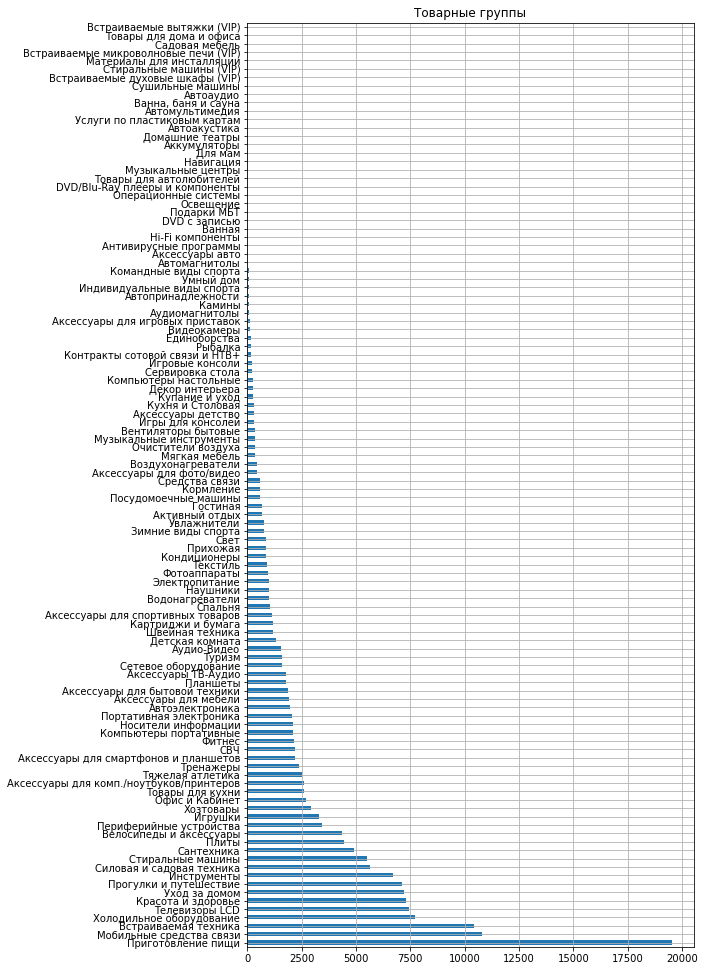

In [55]:
df['TK'].value_counts().plot(kind='barh', title='Товарные группы', grid=True, figsize=( 8 , 17 ))

In [63]:
# Сомнения вызывают группы "Подарки МБТ" и "Подарки КБТ"
df[(df['TK']=='Подарки МБТ')]

,Order_ID,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,Регион,Город
1891,1984000343_TT,55574850-54515351485075,Онлайн-Резерв.,2016-03-01,16:49:50.000,201603,2016-03-01 18:29:02.000,2016-03-08 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Петрозаводск,Республика Карелия,3693,3.0,0.0,3.0,2.0,1242406.0,Чайник Ariete 2891 (подарок),Чайники электрические,1.0,3.0,0.0,3.0,Ariete,Мелкая бытовая техника,Подарки МБТ,Техника для кухни/Приготовление пищи/Чайники и...,9.0,293400.0,NORTH,Петрозаводск
1908,1984000362_TT,55575452-49555556485570,Онлайн-Резерв.,2016-03-01,16:54:33.000,201603,2016-03-04 20:15:47.000,2016-03-03 00:00:00.000,2016-03-03 02:48:26.000,Выдан клиенту,14,0,NaN,NaN,Курьерская,оффлайн,Москва,Москва,2189,1490.0,0.0,1490.0,2.0,1184685.0,Фен Polaris PHD 2249LTi (подарок),Фены,1.0,1240.0,0.0,1240.0,Polaris,Мелкая бытовая техника,Подарки МБТ,Красота и здоровье/Уход за волосами/Фены/,9.0,149399.0,CENTRAL,Москва
1956,1986001001_TT,55574954-51545055554870,Онлайн-Резерв.,2016-03-01,17:10:44.000,201603,2016-03-01 18:02:26.000,2016-03-08 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Петрозаводск,Республика Карелия,3693,18.0,0.0,18.0,2.0,1242406.0,Чайник Ariete 2891 (подарок),Чайники электрические,6.0,3.0,0.0,18.0,Ariete,Мелкая бытовая техника,Подарки МБТ,Техника для кухни/Приготовление пищи/Чайники и...,9.0,293400.0,NORTH,Петрозаводск
1999,1986001044_TT,55574851-50525351535678,Онлайн-Резерв.,2016-03-01,17:24:29.000,201603,2016-03-01 18:36:00.000,2016-03-08 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Москва,Москва,3048,2.0,0.0,2.0,2.0,1242406.0,Чайник Ariete 2891 (подарок),Чайники электрические,1.0,2.0,0.0,2.0,Ariete,Мелкая бытовая техника,Подарки МБТ,Техника для кухни/Приготовление пищи/Чайники и...,9.0,293400.0,CENTRAL,Москва
2014,1986001059_TT,55575349-54484953545670,Онлайн-Резерв.,2016-03-01,17:30:51.000,201603,2016-03-01 18:41:48.000,2016-03-08 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Санкт-Петербург,Ленинградская обл.,3191,2.0,0.0,2.0,2.0,1242406.0,Чайник Ariete 2891 (подарок),Чайники электрические,1.0,2.0,0.0,2.0,Ariete,Мелкая бытовая техника,Подарки МБТ,Техника для кухни/Приготовление пищи/Чайники и...,9.0,293400.0,NORTH,Санкт-Петербург
2035,1987000741_TT,55574852-535349575454735,Онлайн-Резерв.,2016-03-01,17:37:19.000,201603,2016-03-01 18:45:52.000,2016-03-08 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Петрозаводск,Республика Карелия,3693,3.0,0.0,3.0,2.0,1242406.0,Чайник Ariete 2891 (подарок),Чайники электрические,1.0,3.0,0.0,3.0,Ariete,Мелкая бытовая техника,Подарки МБТ,Техника для кухни/Приготовление пищи/Чайники и...,9.0,293400.0,NORTH,Петрозаводск
2039,1987000745_TT,55574852-535349575454735,Онлайн-Резерв.,2016-03-01,17:38:27.000,201603,2016-03-01 18:47:38.000,2016-03-08 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Петрозаводск,Республика Карелия,3693,9.0,0.0,9.0,2.0,1242406.0,Чайник Ariete 2891 (подарок),Чайники электрические,3.0,3.0,0.0,9.0,Ariete,Мелкая бытовая техника,Подарки МБТ,Техника для кухни/Приготовление пищи/Чайники и...,9.0,293400.0,NORTH,Петрозаводск
2043,1987000748_TT,55574851-545556555253725,Онлайн-Резерв.,2016-03-01,17:39:01.000,201603,2016-03-01 18:50:37.000,2016-03-08 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Санкт-Петербург,Ленинградская обл.,3667,2.0,0.0,2.0,2.0,1242406.0,Чайник Ariete 2891 (подарок),Чайники электрические,1.0,2.0,0.0,2.0,Ariete,Мелкая бытовая техника,Подарки МБТ,Техника для кухни/Приготовление пищи/Чайники и...,9.0,293400.0,NORTH,Санкт-Петербург
2053,1987000759_TT,555

In [64]:
df[(df['TK']=='Подарки КБТ')]

,Order_ID,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,Регион,Город
173449,5869065_BX,55574851-495554575055795,Онлайн-Резерв.,2016-04-27,14:48:39.000,201604,2016-05-01 15:01:25.000,2016-05-11 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Ошибка в информации о товаре,NaN,Самовывоз,оффлайн,Омск,Омская обл.,3240,13.0,0.0,13.0,2.0,1257920.0,Посуда Korting K 2422 X (подарок),Наборы посуды для приготовления пищи,1.0,13.0,0.0,13.0,Korting,Крупная бытовая техника,Подарки КБТ,Товары для дома/Посуда и сервировка стола/Посу...,17.0,345278.0,SIBERIA,Омск
176626,5879046_BX,55574850-575051575357745,Онлайн-Резерв.,2016-04-28,17:04:04.000,201604,2016-04-28 18:29:37.000,2016-05-02 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Воронеж,Воронежская обл.,3485,12.0,0.0,12.0,2.0,1257920.0,Посуда Korting K 2422 X (подарок),Наборы посуды для приготовления пищи,1.0,12.0,0.0,12.0,Korting,Крупная бытовая техника,Подарки КБТ,Товары для дома/Посуда и сервировка стола/Посу...,17.0,345278.0,CENTRAL,Воронеж
176635,5879063_BX,55574854-505248565549755,Онлайн-Резерв.,2016-04-28,17:05:27.000,201604,2016-04-28 17:37:42.000,2016-05-02 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Другое (указать в примечании),NaN,Самовывоз,оффлайн,Воронеж,Воронежская обл.,3485,12.0,0.0,12.0,2.0,1257920.0,Посуда Korting K 2422 X (подарок),Наборы посуды для приготовления пищи,1.0,12.0,0.0,12.0,Korting,Крупная бытовая техника,Подарки КБТ,Товары для дома/Посуда и сервировка стола/Посу...,17.0,345278.0,CENTRAL,Воронеж
176636,5879067_BX,55574854-505248565549755,Онлайн-Резерв.,2016-04-28,17:06:04.000,201604,2016-04-28 17:37:42.000,2016-05-02 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Другое (указать в примечании),NaN,Самовывоз,оффлайн,Воронеж,Воронежская обл.,3485,12.0,0.0,12.0,2.0,1257920.0,Посуда Korting K 2422 X (подарок),Наборы посуды для приготовления пищи,1.0,12.0,0.0,12.0,Korting,Крупная бытовая техника,Подарки КБТ,Товары для дома/Посуда и сервировка стола/Посу...,17.0,345278.0,CENTRAL,Воронеж
176642,5879084_BX,55574850-575051575357745,Онлайн-Резерв.,2016-04-28,17:06:45.000,201604,2016-04-28 18:39:59.000,2016-05-02 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Воронеж,Воронежская обл.,3485,12.0,0.0,12.0,2.0,1257920.0,Посуда Korting K 2422 X (подарок),Наборы посуды для приготовления пищи,1.0,12.0,0.0,12.0,Korting,Крупная бытовая техника,Подарки КБТ,Товары для дома/Посуда и сервировка стола/Посу...,17.0,345278.0,CENTRAL,Воронеж
176643,5879088_BX,55574854-505248565549755,Онлайн-Резерв.,2016-04-28,17:07:16.000,201604,2016-04-28 17:37:42.000,2016-05-02 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Другое (указать в примечании),NaN,Самовывоз,оффлайн,Воронеж,Воронежская обл.,3485,12.0,0.0,12.0,2.0,1257920.0,Посуда Korting K 2422 X (подарок),Наборы посуды для приготовления пищи,1.0,12.0,0.0,12.0,Korting,Крупная бытовая техника,Подарки КБТ,Товары для дома/Посуда и сервировка стола/Посу...,17.0,345278.0,CENTRAL,Воронеж
176646,5879097_BX,55555750-53535149574979,Онлайн-Резерв.,2016-04-28,17:07:41.000,201604,2016-05-03 16:10:29.000,2016-05-02 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет товара,NaN,Самовывоз,оффлайн,Воронеж,Воронежская обл.,3485,12.0,0.0,12.0,2.0,1257920.0,Посуда Korting K 2422 X (подарок),Наборы посуды для приготовления пищи,1.0,12.0,0.0,12.0,Korting,Крупная бытовая техника,Подарки КБТ,Товары для дома/Посуда и сервировка стола/Посу...,17.0,345278.0,CENTRAL,Воронеж
176647,5879102_BX,55574851-505054545649785,Онлайн-Резерв.,2016-04-28,17:07:44.000,201604,2016-04-28 18:49:24.000,2016-05-02 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Другое (указать в примечании),NaN,Самовывоз,оффлайн,Воронеж,Воронежская обл.,3485,60.0,0.0,60.

In [177]:
# В группе Подарки КБТ товары стоят "копейки". Вероятно это товары, которые идут в подарок при покупке. Удалим данную группу:
df=df.drop(df[(df['TK'] == "Подарки КБТ")].index)

In [136]:
# Проанализируем значения TN
df['Brand'].value_counts()

Samsung      9334
Bosch        7522
Philips      4908
LG           4857
ASUS         4669
             ... 
Башфарфор       1
Fujitsu         1
Miles           1
Atomic          1
SmartBuy        1
Name: Brand, Length: 1178, dtype: int64

<AxesSubplot:title={'center':'Бренд'}>

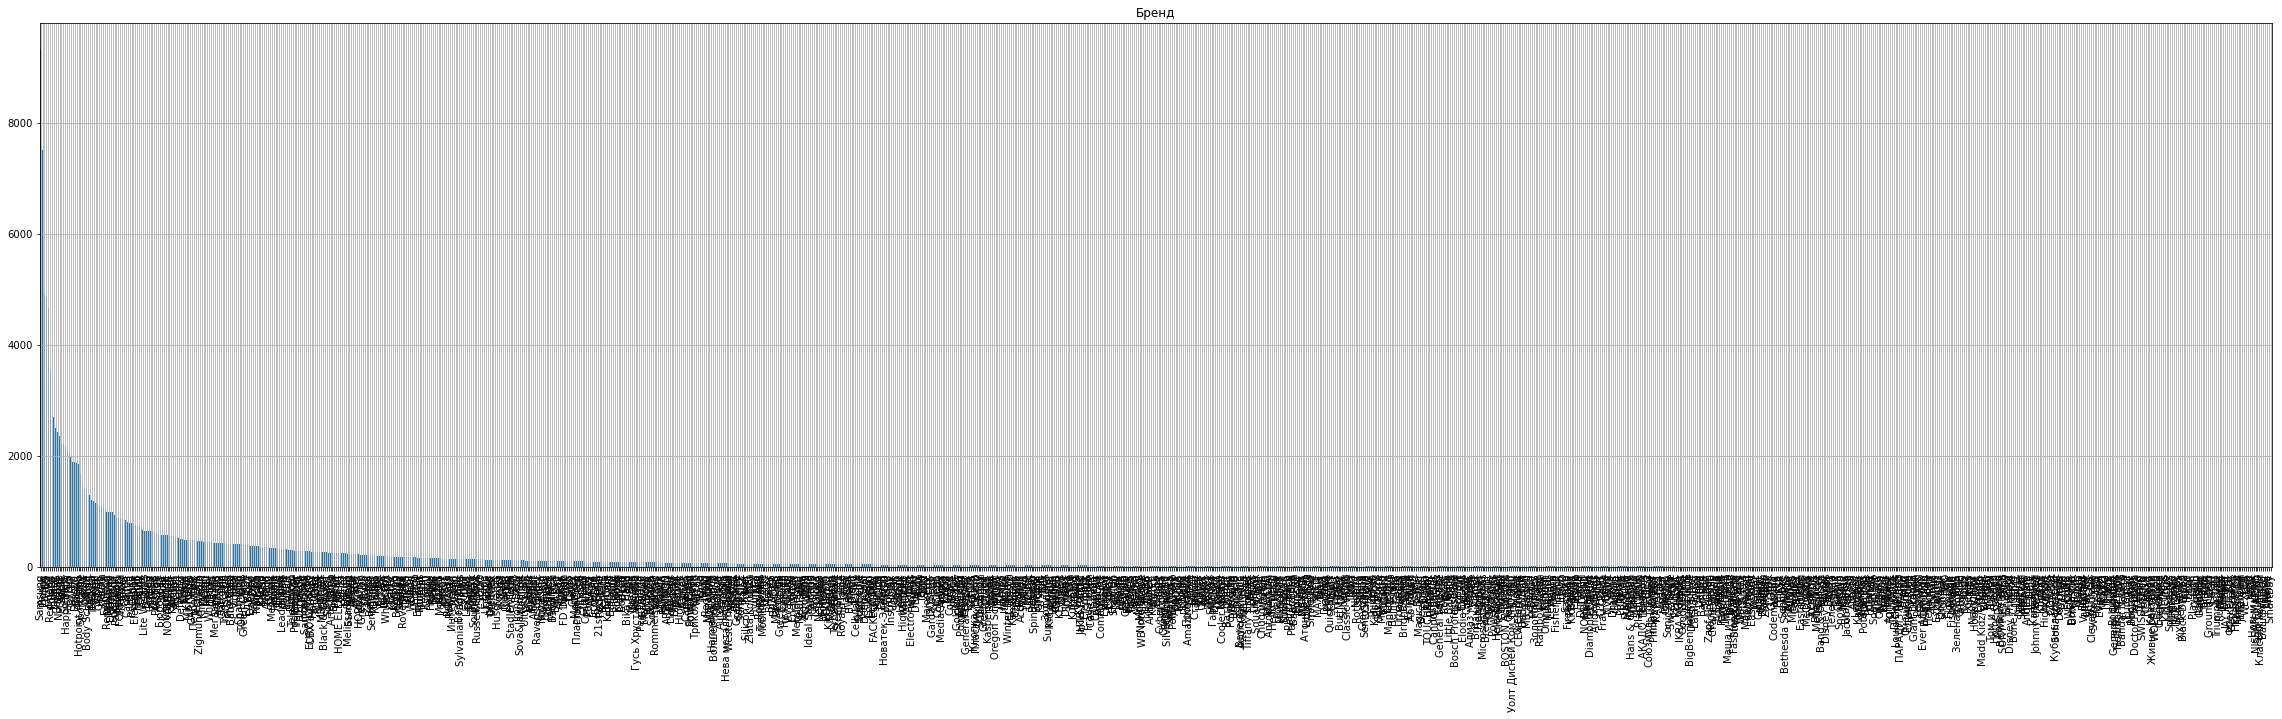

In [147]:
df['Brand'].value_counts().plot(kind='bar', title='Бренд', grid=True, figsize=( 40 , 10 ))

In [66]:
# Удалим ненужные столбцы
# Для темы "Сегментация и профилирование клиентов" нам важны не все столбцы:
# Order_ID - идентификатор чека - оставляем
# Email_new - удалилий параметр
# время - время создания заказа, слишком узкий параметр, убираем, выберем более широкий параметр
# месяц - месяц создания заказа, подойдет для построения прогноза, оставляем
# ChangeDate - дата внесения изменений, показатель не дает никакой ценной информации, убираем
# DeliveryDate - дата доставки, показатель не дает никакой ценной информации, убираем
# PaymentDate - дата оплаты, не нужен, убираем
# Status - статус заказа, ценный показатель, оставляем
# Status_ID - id_статуса заказа, дублирует информацию предыдущего показателя, убираем
# OneClick - флаг совершения быстрого заказа, подойдет для выявления доли клиентов, предпочитающих быстрый заказ, оставляем
# CancelReason - причина отмены, необходим для фильтрации, оставляем
# Actions - акции, убираем
# DeliveryType - тип доставки, необходим для анализа, оставляем
# PaymentType - тип оплаты, необходим для анализа, оставляем
# Region - регин, необходимо заменить на более общий показатель
# Area - область, необходимо заменить на более общий показатель
# Store_ID - ID_склада, ненужный показатель, убираем
# FullSum -  сумма одного чека с учетом всех скидок, убираем
# Discount - общая сумма скидки по чеку, оставляем
# IM_Rozn_Sum
# Row_ID - номер позиции в чеке, убираем
# Articul - номер артикула, слишком узко удаляем
# Nom_Name - Детализированное название товарной позиции, слишком узко, удаляем
# NomGroup - Название товарной позиции, слишком узко, удаляем
# Quant - количество товаров, оставляем
# RowPrice - цена товара без скидки, не нужен, удаляем
# RowDiscount - то сумма скидки на определенный товар в чеке с учетом его кол-ва (скидка на единицу товара умноженная на кол-во данного товара), удаляем
# RowSum - показатель выручки, ос тавляем 
# Brand - бренд, слишком узкий показатель, удаляем
# TN - товарное напрвление, оставляем
# TK - название группы товаров, оставляем
# NomFullPath - полное название группы товаров, пока оставим
# Week - неделя, удаляем
# Nom_ID - номер номенклатуры, не нужен, удаляем
# Регион - оставляем
# Город - дубликат, удаляем

In [298]:
# Посмотрим, как выглядит датасет после чистки
data = []
for column in df:
    data.append([column] + columnValues(df[column]))

In [299]:
print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column       |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type      |
|--------------+----------------+---------------+--------------+-------------+----------------|
| Order_ID     |         159144 |             0 |            0 |         0   | object         |
| Phone_new    |         122785 |             0 |            0 |         0   | object         |
| Source       |              4 |             0 |            0 |         0   | object         |
| OrderDate    |             61 |             0 |            0 |         0   | datetime64[ns] |
| время        |          57932 |             0 |            0 |         0   | object         |
| месяц        |              2 |             0 |            0 |         0   | int64          |
| ChangeDate   |         148115 |             0 |            0 |         0   | object         |
| DeliveryDate |            100 |             0 |            0 |         0   | object         |
| PaymentDate  |         102293 |       

In [178]:
df1=copy.deepcopy(df)

In [179]:
# Проверим числовые показатели на ошибки
print((df1['Discount']<0).sum(axis=0))
print((df1['RowSum']<0).sum(axis=0))
print((df1['Quant']<0).sum(axis=0))

0
0
0


In [180]:
# Выведем получившийся датасет после чистки
df1

,Order_ID,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,PaymentDate,Status,Status_ID,OneClick,CancelReason,Actions,DeliveryType,PaymentType,Region,Area,Store_ID,FullSum,Discount,IM_Rozn_Sum,Row_ID,Articul,Nom_Name,NomGroup,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID,Регион,Город
0,1303000511_TT,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:46:45.000,201603,2016-03-05 09:16:49.000,2016-03-01 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Клиент не пришел за заказом,NaN,Самовывоз,оффлайн,Москва,Москва,3305,2970.0,0.0,2970.0,2.0,1177293.0,Глад. доска Ника Валенсия НВ1,Гладильные доски,1.0,2970.0,0.0,2970.0,Ника,Товары для дома,Хозтовары,Техника для дома/Техника для ухода за одеждой/...,9.0,90364.0,CENTRAL,Москва
1,1303000513_TT,55575655-50555350534877,Онлайн-Резерв.,2016-03-11,16:06:56.000,201603,2016-03-11 20:11:18.000,2016-03-12 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет связи с клиентом,БесплатнаяДоставкаНаСуммуКорзины,Курьерская,оффлайн,Москва,Москва,2789,19990.0,0.0,19990.0,2.0,1190326.0,LED Телевизор Samsung UE-32J4000AK,LED телевизоры,1.0,19990.0,0.0,19990.0,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",10.0,120757.0,CENTRAL,Москва
2,1303000520_TT,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,2016-03-04 15:09:39.000,Выдан клиенту,14,0,NaN,NaN,Самовывоз,оффлайн,Москва,Москва,3518,2420.0,0.0,2420.0,2.0,1172127.0,Картридж HP №950 CN049AE черный,Картриджи струйные,1.0,2420.0,0.0,2420.0,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9.0,76102.0,CENTRAL,Москва
3,1303000521_TT,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,00:02:17.000,201603,2016-03-03 15:03:50.000,2016-03-02 00:00:00.000,2016-03-02 00:36:12.000,Выдан клиенту,14,0,NaN,"БесплатнаяДоставкаНаСуммуКорзины,СкидкаСуммойП...",Курьерская,оффлайн,Санкт-Петербург,Ленинградская обл.,2656,8999.0,1.0,8999.0,2.0,1179175.0,Эл.плита Darina 1B ЕМ341 406 W,Электрические плиты,1.0,10999.0,2000.0,8999.0,Darina,Крупная бытовая техника,Плиты,Техника для кухни/Крупная бытовая техника/Плит...,9.0,93780.0,NORTH,Санкт-Петербург
4,1303000522_TT,55575456-48485254505072,Онлайн-Резерв.,2016-03-01,00:02:26.000,201603,2016-03-02 16:56:42.000,2016-03-04 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Нет партнерского товара,NaN,Самовывоз,оффлайн,Люберцы,Московская обл.,3080,3919.0,0.0,3919.0,2.0,1234632.0,Блендер Polaris PHB 1321L черный,Блендеры,1.0,3919.0,0.0,3919.0,Polaris,Мелкая бытовая техника,Приготовление пищи,Техника для кухни/Обработка продуктов/Блендеры/,9.0,271556.0,CENTRAL,Люберцы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182535,5898089_BX,55574957-51495048515075,Онлайн-Резерв.,2016-04-30,23:51:37.000,201604,2016-05-03 12:55:07.000,2016-05-02 00:00:00.000,2016-05-02 00:10:22.000,Выдан клиенту,14,0,NaN,NaN,Курьерская,оффлайн,Москва,Москва,2189,1149.0,0.0,1149.0,2.0,1158853.0,Вент/напол Saturn ST-FN8268,Вентиляторы,1.0,899.0,0.0,899.0,Saturn,Климат,Вентиляторы бытовые,Техника для дома/Климатическая техника/Кондици...,17.0,38755.0,CENTRAL,Москва
182536,5898095_BX,55575452-55554849505278,Онлайн-Резерв.,2016-04-30,23:54:03.000,201604,2016-05-04 19:43:40.000,2016-05-07 00:00:00.000,2016-05-04 19:43:41.000,Выдан клиенту,14,1,NaN,NaN,Самовывоз,оффлайн,Серпухов,Московская обл-2,3384,1090.0,0.0,1090.0,2.0,1155686.0,Сумка Case Logic DCB304K черн.,Сумки для зеркальных фотоаппаратов,1.0,1090.0,0.0,1090.0,Case Logic,Аксессуары,Аксессуары для фото/видео,Фото- и видеотехника/Аксессуары для фото и вид...,17.0,31908.0,CENTRAL,Серпухов
182537,5898099_BX,55574948-50554849554878,Онлайн-Резерв.,2016-04-30,23:56:02.000,201604,2016-05-01 11:57:42.000,2016-05-08 00:00:00.000,1900-01-01 00:00:00.000,Отменен,17,0,Неполные данные в заказе,БесплатнаяДоставкаНаСуммуКорзины,Курьерская,офф

In [181]:
df1.to_csv('df1.csv', index=False)

In [71]:
# СВОДНЫЕ ТАБЛИЦЫ

In [65]:
# напишем функцию расчета среднего для таблицы
def meancheck(s):
    df.groupby(['Order_ID'])
    return s.mean()

In [66]:
# Напишем агрегированную функцию
agg_func = {'RowSum': ['sum'],
            'Order_ID': ['nunique'],
            'Phone_new': ['nunique'],
            'FullSum': [meancheck],
            'Quant':[meancheck, 'sum'],
            'NomGroup': ['nunique']
}

In [67]:
# РАЗМЕЩЕННЫЕ ЗАКАЗЫ
df3=df.groupby(['месяц']).agg(agg_func)
df3.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df3

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
месяц,,,,,,,
201603,918270710.0,82872,66212,12579.174451,1.069628,101144.0,791
201604,847942954.0,76273,60853,12881.048169,1.072514,94304.0,794


In [182]:
# датасет выданных заказов
df_bought = df[df.Status =='Выдан клиенту']

In [76]:
# ВЫДАННЫЕ ЗАКАЗЫ
df4=df_bought.groupby(['месяц']).agg(agg_func)
df4.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df4

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
месяц,,,,,,,
201603,524614785.0,54448,47786,10641.826439,1.046606,64719.0,758
201604,487190825.0,50949,44179,10736.366993,1.055879,61638.0,761


In [77]:
# ВЫКУПАЕМОСТЬ
df5=df4/df3
df5.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df5.style.format("{:.2%}")

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
месяц,,,,,,,
201603,57.13%,65.70%,72.17%,84.60%,97.85%,63.99%,95.83%
201604,57.46%,66.80%,72.60%,83.35%,98.45%,65.37%,95.84%


In [69]:
# Размещенные заказы (группировка по TN)
df7=df.groupby(['TN']).agg(agg_func)
df7.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df7.sort_values(by='Кол-во чеков', ascending=False)

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
TN,,,,,,,
Мелкая бытовая техника,200772550.0,34925,28881,7875.285450,1.046670,39247.0,80
Крупная бытовая техника,554045314.0,26250,19647,24784.686619,1.012159,29053.0,27
Цифровая Техника,367147113.0,21280,18170,18715.861076,1.040267,22941.0,42
Сделай сам,108408957.0,14440,12446,8766.623969,1.059768,18352.0,158
Аксессуары,28201988.0,14020,12097,6315.037037,1.102765,17427.0,144
Спорт и активный отдых,100979470.0,13597,11331,8297.557357,1.172427,18760.0,85
Детские товары,75637585.0,11690,10054,6914.262900,1.034803,13380.0,143
ТВ-Аудио,247711206.0,11184,8690,24179.221501,1.103005,12775.0,39
Мебель,34128969.0,6933,6063,6222.316138,1.111827,8799.0,40


In [321]:
df7=df7.sort_values(by='Кол-во чеков', ascending=False)
df7.astype({'Выручка':np.int,'Кол-во чеков':np.int,'Кол-во уникальных клиентов':np.int,'Средний чек':np.int,'Среднее кол-во товаров в чеке':np.float64,'Кол-во товаров':np.int,'Кол-во уникальных товаров':np.int})

C:\Users\Ксения\AppData\Local\Temp\ipykernel_12116\1358378507.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df7.astype({'Выручка':np.int,'Кол-во чеков':np.int,'Кол-во уникальных клиентов':np.int,'Средний чек':np.int,'Среднее кол-во товаров в чеке':np.float64,'Кол-во товаров':np.int,'Кол-во уникальных товаров':np.int})


,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
TN,,,,,,,
Мелкая бытовая техника,200772550,34925,28881,7875,1.046670,39247,80
Крупная бытовая техника,554045314,26250,19647,24784,1.012159,29053,27
Цифровая Техника,367147113,21280,18170,18715,1.040267,22941,42
Сделай сам,108408957,14440,12446,8766,1.059768,18352,158
Аксессуары,28201988,14020,12097,6315,1.102765,17427,144
Спорт и активный отдых,100979470,13597,11331,8297,1.172427,18760,85
Детские товары,75637585,11690,10054,6914,1.034803,13380,143
ТВ-Аудио,247711206,11184,8690,24179,1.103005,12775,39
Мебель,34128969,6933,6063,6222,1.111827,8799,40


In [70]:
# ВЫДАННЫЕ ЗАКАЗЫ (группировка по TN)
df8=df_bought.groupby(['TN']).agg(agg_func)
df8.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df8.sort_values(by='Кол-во чеков', ascending=False)

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
TN,,,,,,,
Мелкая бытовая техника,128820535.0,24574,21844,6347.104059,1.023184,26392.0,76
Крупная бытовая техника,357532141.0,17859,14795,23303.864375,1.008536,19613.0,27
Цифровая Техника,148919945.0,11694,10923,13660.522118,1.033031,12416.0,40
Сделай сам,67222249.0,9908,9179,7704.739196,1.051888,12650.0,155
Аксессуары,18020355.0,9795,9010,5051.640452,1.081550,11724.0,138
Спорт и активный отдых,58498313.0,8735,8112,7208.779881,1.131550,11509.0,79
Детские товары,44753951.0,7464,7095,6277.793207,1.022604,8460.0,139
ТВ-Аудио,135011848.0,6923,5825,20749.659769,1.016695,7186.0,38
Мебель,24643637.0,5272,5015,5674.018183,1.110926,6670.0,38


In [320]:
df8=df8.sort_values(by='Кол-во чеков', ascending=False) 
df8.astype({'Выручка':np.int,'Кол-во чеков':np.int,'Кол-во уникальных клиентов':np.int,'Средний чек':np.int,'Среднее кол-во товаров в чеке':np.float64,'Кол-во товаров':np.int,'Кол-во уникальных товаров':np.int})

C:\Users\Ксения\AppData\Local\Temp\ipykernel_12116\686595601.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df8.astype({'Выручка':np.int,'Кол-во чеков':np.int,'Кол-во уникальных клиентов':np.int,'Средний чек':np.int,'Среднее кол-во товаров в чеке':np.float64,'Кол-во товаров':np.int,'Кол-во уникальных товаров':np.int})


,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
TN,,,,,,,
Мелкая бытовая техника,128820535,24574,21844,6347,1.023184,26392,76
Крупная бытовая техника,357532141,17859,14795,23303,1.008536,19613,27
Цифровая Техника,148919945,11694,10923,13660,1.033031,12416,40
Сделай сам,67222249,9908,9179,7704,1.051888,12650,155
Аксессуары,18020355,9795,9010,5051,1.081550,11724,138
Спорт и активный отдых,58498313,8735,8112,7208,1.131550,11509,79
Детские товары,44753951,7464,7095,6277,1.022604,8460,139
ТВ-Аудио,135011848,6923,5825,20749,1.016695,7186,38
Мебель,24643637,5272,5015,5674,1.110926,6670,38


In [73]:
# ВЫКУПАЕМОСТЬ (группировка по TN)
df9=df8/df7
df9.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df91=df9.sort_values(by='Кол-во чеков', ascending=False)

In [74]:
df91.style.format("{:.2%}")

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
TN,,,,,,,
"Хобби, досуг",100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
Мебель,72.21%,76.04%,82.71%,91.19%,99.92%,75.80%,95.00%
Товары для дома,67.19%,70.98%,76.73%,89.63%,98.18%,69.54%,96.90%
Мелкая бытовая техника,64.16%,70.36%,75.63%,80.60%,97.76%,67.25%,95.00%
Аксессуары,63.90%,69.86%,74.48%,79.99%,98.08%,67.27%,95.83%
Климат,58.96%,69.00%,75.09%,73.22%,97.79%,63.91%,93.33%
Сделай сам,62.01%,68.61%,73.75%,87.89%,99.26%,68.93%,98.10%
Крупная бытовая техника,64.53%,68.03%,75.30%,94.03%,99.64%,67.51%,100.00%
Спорт и активный отдых,57.93%,64.24%,71.59%,86.88%,96.51%,61.35%,92.94%


<AxesSubplot:title={'center':'Выкупаемость в разрезе TN (Товарных направлений)'}, ylabel='TN'>

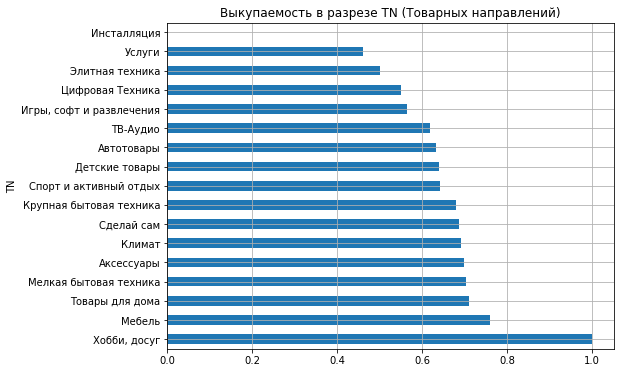

In [82]:
df91['Кол-во чеков'].plot(kind='barh', title='Выкупаемость в разрезе TN (Товарных направлений)', grid=True, figsize=( 8 , 6 ))

In [83]:
# Размещенные заказы (группировка по TK)
df10=df.groupby(['TK']).agg(agg_func)
df10.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df10.sort_values(by='Кол-во чеков', ascending=False)

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
TK,,,,,,,
Приготовление пищи,95650372.0,18346,15586,7427.698276,1.058908,20708.0,37
Мобильные средства связи,198421525.0,10446,9075,20434.106786,1.024508,11036.0,3
Встраиваемая техника,178214405.0,9058,6832,26044.178938,1.005359,10505.0,19
Холодильное оборудование,185880120.0,7597,6110,27705.482578,1.018583,7838.0,5
Телевизоры LCD,220977809.0,7300,5359,32471.898656,1.021408,7586.0,5
...,...,...,...,...,...,...,...
Стиральные машины (VIP),73860.0,1,1,73860.000000,1.000000,1.0,1
Материалы для инсталляции,6270.0,1,1,6270.000000,30.000000,30.0,1
Садовая мебель,7527.0,1,1,7527.000000,1.000000,1.0,1


In [84]:
# ВЫДАННЫЕ ЗАКАЗЫ (группировка по TK)
df11=df_bought.groupby(['TK']).agg(agg_func)
df11.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df11.sort_values(by='Кол-во чеков', ascending=False)

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
TK,,,,,,,
Приготовление пищи,59657772.0,12927,11809,5773.242499,1.026537,13810.0,35
Встраиваемая техника,115214607.0,6132,5173,24709.152995,1.004820,7088.0,19
Холодильное оборудование,119730086.0,5208,4579,25803.244459,1.015048,5329.0,4
Мобильные средства связи,66374091.0,4954,4731,14273.284222,1.027384,5215.0,3
Красота и здоровье,13117356.0,4953,4632,3192.795306,1.016342,5162.0,25
...,...,...,...,...,...,...,...
Товары для дома и офиса,35.0,1,1,2837.000000,1.000000,1.0,1
Встраиваемые микроволновые печи (VIP),39780.0,1,1,39780.000000,1.000000,1.0,1
Автомультимедия,4329.0,1,1,4329.000000,1.000000,1.0,1


In [85]:
# ВЫКУПАЕМОСТЬ (группировка по TK)
df12=df11/df10
df12.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df12=df12.sort_values(by='Кол-во чеков', ascending=False)
df12.style.format("{:.2%}")

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
TK,,,,,,,
"Ванна, баня и сауна",100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
Садовая мебель,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
Товары для дома и офиса,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
Встраиваемые микроволновые печи (VIP),100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
Домашние театры,89.91%,90.00%,100.00%,99.31%,100.00%,90.00%,100.00%
Сетевое оборудование,80.15%,81.46%,84.19%,92.39%,100.54%,81.86%,100.00%
Сушильные машины,85.28%,80.00%,80.00%,109.99%,107.14%,85.71%,100.00%
Увлажнители,70.57%,78.77%,82.59%,88.93%,96.99%,76.46%,80.00%
Аксессуары для мебели,77.83%,78.31%,83.73%,96.82%,100.98%,79.74%,100.00%


<AxesSubplot:title={'center':'Выкупаемость в разрезе TK (Товарных групп)'}, ylabel='TK'>

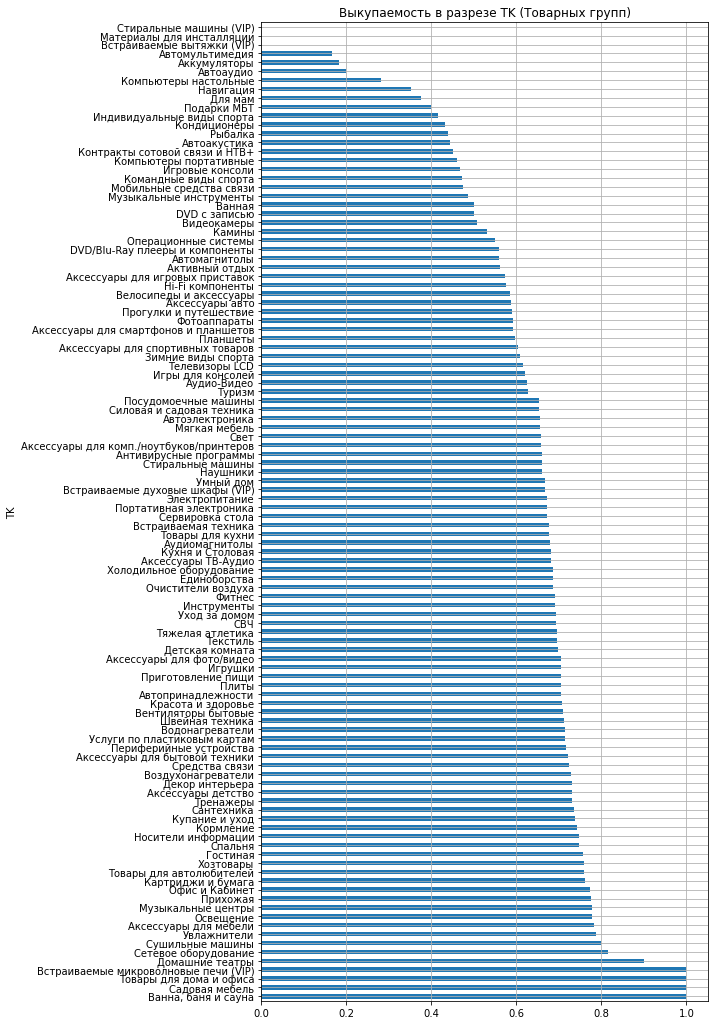

In [88]:
df12['Кол-во чеков'].plot(kind='barh', title='Выкупаемость в разрезе TK (Товарных групп)', grid=True, figsize=( 8 , 18 ))

In [89]:
# Размещенные заказы (группировка по Регион)
df13=df.groupby(['Регион']).agg(agg_func)
df13.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df13.sort_values(by='Кол-во чеков', ascending=False)

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
Регион,,,,,,,
CENTRAL,930418763.0,83373,65481,12535.316934,1.077961,103246.0,792
NORTH,415442181.0,39165,29143,12301.571668,1.045838,46362.0,748
PRIVOLZIE,207582040.0,18039,13732,14002.459294,1.069605,22374.0,688
SIBERIA,83732472.0,7795,6337,12054.445798,1.094007,9729.0,581
SOUTHERN,63993905.0,5542,4370,12537.964375,1.102253,7093.0,545
URAL,64016803.0,5195,3917,15489.680943,1.083265,6583.0,535
FAR EAST,1027500.0,42,42,21902.232143,1.089286,61.0,42


In [335]:
df13=df13.sort_values(by='Кол-во чеков', ascending=False) 
df13.astype({'Выручка':np.int,'Кол-во чеков':np.int,'Кол-во уникальных клиентов':np.int,'Средний чек':np.int,'Среднее кол-во товаров в чеке':np.float64,'Кол-во товаров':np.int,'Кол-во уникальных товаров':np.int})

C:\Users\Ксения\AppData\Local\Temp\ipykernel_12116\3880988852.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df13.astype({'Выручка':np.int,'Кол-во чеков':np.int,'Кол-во уникальных клиентов':np.int,'Средний чек':np.int,'Среднее кол-во товаров в чеке':np.float64,'Кол-во товаров':np.int,'Кол-во уникальных товаров':np.int})


,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
Регион,,,,,,,
CENTRAL,930418763,83373,65481,12535,1.077961,103246,792
NORTH,415442181,39165,29143,12301,1.045838,46362,748
PRIVOLZIE,207582040,18039,13732,14002,1.069605,22374,688
SIBERIA,83732472,7795,6337,12054,1.094007,9729,581
SOUTHERN,63993905,5542,4370,12537,1.102253,7093,545
URAL,64016803,5195,3917,15489,1.083265,6583,535
FAR EAST,1027500,42,42,21902,1.089286,61,42


In [90]:
# ВЫДАННЫЕ ЗАКАЗЫ (группировка по Регион)
df14=df_bought.groupby(['Регион']).agg(agg_func)
df14.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df14.sort_values(by='Кол-во чеков', ascending=False)

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
Регион,,,,,,,
CENTRAL,531390255.0,55809,47906,10541.391999,1.053350,67644.0,766
NORTH,252639347.0,26855,22005,10729.939729,1.039261,31394.0,692
PRIVOLZIE,113890000.0,11366,9713,10788.885478,1.043717,13322.0,621
SIBERIA,45971740.0,4835,4316,10403.645808,1.077751,5905.0,514
SOUTHERN,35441134.0,3467,3015,10885.982864,1.082147,4334.0,474
URAL,31953242.0,3032,2538,12787.744963,1.061143,3714.0,468
FAR EAST,537722.0,33,33,15485.893617,1.106383,52.0,35


In [336]:
df14=df14.sort_values(by='Кол-во чеков', ascending=False) 
df14.astype({'Выручка':np.int,'Кол-во чеков':np.int,'Кол-во уникальных клиентов':np.int,'Средний чек':np.int,'Среднее кол-во товаров в чеке':np.float64,'Кол-во товаров':np.int,'Кол-во уникальных товаров':np.int})

C:\Users\Ксения\AppData\Local\Temp\ipykernel_12116\1331419716.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df14.astype({'Выручка':np.int,'Кол-во чеков':np.int,'Кол-во уникальных клиентов':np.int,'Средний чек':np.int,'Среднее кол-во товаров в чеке':np.float64,'Кол-во товаров':np.int,'Кол-во уникальных товаров':np.int})


,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
Регион,,,,,,,
CENTRAL,531390255,55809,47906,10541,1.053350,67644,766
NORTH,252639347,26855,22005,10729,1.039261,31394,692
PRIVOLZIE,113890000,11366,9713,10788,1.043717,13322,621
SIBERIA,45971740,4835,4316,10403,1.077751,5905,514
SOUTHERN,35441134,3467,3015,10885,1.082147,4334,474
URAL,31953242,3032,2538,12787,1.061143,3714,468
FAR EAST,537722,33,33,15485,1.106383,52,35


In [91]:
# ВЫКУПАЕМОСТЬ (группировка по Регион)
df15=df14/df13
df15.columns = ['Выручка','Кол-во чеков','Кол-во уникальных клиентов','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров','Кол-во уникальных товаров']
df15=df15.sort_values(by='Кол-во чеков', ascending=False)
df15.style.format("{:.2%}")

,Выручка,Кол-во чеков,Кол-во уникальных клиентов,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров,Кол-во уникальных товаров
Регион,,,,,,,
FAR EAST,52.33%,78.57%,78.57%,70.70%,101.57%,85.25%,83.33%
NORTH,60.81%,68.57%,75.51%,87.22%,99.37%,67.71%,92.51%
CENTRAL,57.11%,66.94%,73.16%,84.09%,97.72%,65.52%,96.72%
PRIVOLZIE,54.87%,63.01%,70.73%,77.05%,97.58%,59.54%,90.26%
SOUTHERN,55.38%,62.56%,68.99%,86.82%,98.18%,61.10%,86.97%
SIBERIA,54.90%,62.03%,68.11%,86.31%,98.51%,60.69%,88.47%
URAL,49.91%,58.36%,64.79%,82.56%,97.96%,56.42%,87.48%


<AxesSubplot:title={'center':'Выкупаемость в разрезе регионов'}, ylabel='Регион'>

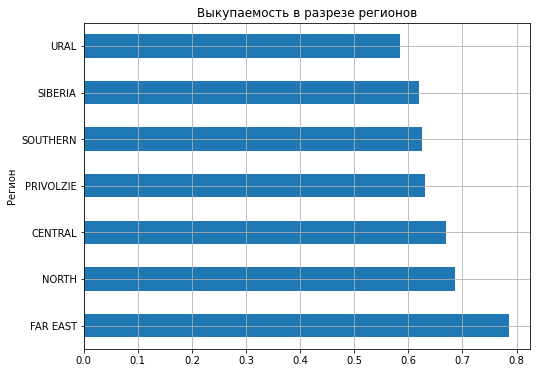

In [93]:
df15['Кол-во чеков'].plot(kind='barh', title='Выкупаемость в разрезе регионов', grid=True, figsize=( 8 , 6 ))

In [184]:
# Напишем агрегированную функцию
agg_func_vitrina = {'RowSum': ['sum'],
            'Order_ID': ['nunique'],
            'FullSum': [meancheck],
            'Quant':[meancheck, 'sum'],
}

In [185]:
df16=df_bought.groupby(['Phone_new']).agg(agg_func_vitrina)
df16.columns = ['Выручка','Кол-во чеков','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров']
df16

,Выручка,Кол-во чеков,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров
Phone_new,,,,,
32565748-000000000,19757.0,8,2469.625,1.0,8.0
32565750-575448565151 а,26599.0,1,26599.000,1.0,2.0
32565750-575448565151 а5,1590.0,1,1590.000,1.0,1.0
43553240-575054413251+75,10129.0,2,5064.500,1.0,2.0
55445748-514957495657715,27449.0,1,27449.000,1.0,1.0
...,...,...,...,...,...
57495456-56485151574991,1609.0,1,1799.000,1.0,1.0
57505548-48535350504991,999.0,1,999.000,1.0,1.0
57555656-55575253555698,3850.0,1,4040.000,1.0,1.0


In [186]:
df17=df.groupby(['Phone_new']).agg(agg_func_vitrina)
df17.columns = ['Выручка','Кол-во чеков','Средний чек','Среднее кол-во товаров в чеке','Кол-во товаров']
df17

,Выручка,Кол-во чеков,Средний чек,Среднее кол-во товаров в чеке,Кол-во товаров
Phone_new,,,,,
32565748-000000000,192942.0,13,17297.200000,1.0,15.0
32565748-535549565054 55,12430.0,1,12430.000000,1.0,1.0
32565750-575448565151 а,26599.0,1,26599.000000,1.0,2.0
32565750-575448565151 а5,1590.0,1,1590.000000,1.0,1.0
43553240-575054413251+75,48557.0,7,6936.714286,1.0,7.0
...,...,...,...,...,...
57505548-48535350504991,999.0,1,999.000000,1.0,1.0
57544955-51485756555597,7700.0,1,7700.000000,1.0,1.0
57555656-55575253555698,3850.0,1,4040.000000,1.0,1.0


In [187]:
# Доля самовывоза
self_carry =  df_bought[(df_bought['DeliveryType'] == 'Самовывоз') ].groupby('Phone_new').sum()['Quant'] / df_bought.groupby('Phone_new').sum()['Quant']

In [188]:
# Доля онлайн оплаты
online_payment =  df_bought[(df_bought['PaymentType'] == 'онлайн') ].groupby('Phone_new').sum()['Quant'] / df_bought.groupby('Phone_new').sum()['Quant']

In [221]:
# Доля покупок со скидкой
discount =  df_bought[(df_bought['Discount'] == 1) ].groupby('Phone_new').sum()['Quant'] / df_bought.groupby('Phone_new').sum()['Quant']

In [222]:
# Доля совершения быстрых заказов
oneclick =  df_bought[(df_bought['OneClick'] == 1) ].groupby('Phone_new').sum()['Quant'] / df_bought.groupby('Phone_new').sum()['Quant']

In [223]:
display = pd.DataFrame()
display['Id'] = df_bought.drop_duplicates(subset='Phone_new')['Phone_new']
display = display.reset_index(drop=True)

In [224]:
display = display.merge(df16, left_on='Id', right_on='Phone_new', how = 'inner')
display = display.rename(columns={'Выручка':'Выручка_Выкуп','Кол-во чеков':'Кол-во чеков_Выкуп','Средний чек':'Средний чек_Выкуп','Среднее кол-во товаров в чеке':'Среднее кол-во товаров в чеке_Выкуп','Кол-во товаров':'Кол-во товаров_Выкуп'})

In [225]:
display = display.merge(df17, left_on='Id', right_on='Phone_new', how = 'inner')
display = display.rename(columns={'Выручка':'Выручка_Все','Кол-во чеков':'Кол-во чеков_Все','Средний чек':'Средний чек_Все','Среднее кол-во товаров в чеке':'Среднее кол-во товаров в чеке_Все','Кол-во товаров':'Кол-во товаров_Все'})

In [226]:
display = display.merge(self_carry, left_on='Id', right_on='Phone_new', how = 'inner')
display = display.rename(columns={'Quant':'ДоляСамовывоза'})

In [227]:
display = display.merge(online_payment, left_on='Id', right_on='Phone_new', how = 'inner')
display = display.rename(columns={'Quant':'ДоляОнлайнОплаты'})

In [228]:
display = display.merge(discount, left_on='Id', right_on='Phone_new', how = 'inner')
display = display.rename(columns={'Quant':'ДоляПокупокСоСкидкой'})

In [229]:
display = display.merge(oneclick, left_on='Id', right_on='Phone_new', how = 'inner')
display = display.rename(columns={'Quant':'ДоляБыстрогоЗаказа'})

In [230]:
display = display[display['Кол-во товаров_Выкуп'] != 0]

In [231]:
display

,Id,Выручка_Выкуп,Кол-во чеков_Выкуп,Средний чек_Выкуп,Среднее кол-во товаров в чеке_Выкуп,Кол-во товаров_Выкуп,Выручка_Все,Кол-во чеков_Все,Средний чек_Все,Среднее кол-во товаров в чеке_Все,Кол-во товаров_Все,ДоляСамовывоза,ДоляОнлайнОплаты,ДоляПокупокСоСкидкой,ДоляБыстрогоЗаказа
0,55575449-54535553535073,2420.0,1,2420.0,1.0,1.0,2420.0,1,2420.00,1.0,1.0,1.0,NaN,NaN,NaN
1,55574954-53565052504871,8999.0,1,8999.0,1.0,1.0,8999.0,1,8999.00,1.0,1.0,NaN,NaN,1.0,NaN
2,55575049-51505248534972,1790.0,1,1790.0,1.0,1.0,1790.0,1,1790.00,1.0,1.0,1.0,NaN,NaN,NaN
3,55574954-53495654564877,1420.0,1,1420.0,1.0,1.0,1420.0,1,1420.00,1.0,1.0,1.0,NaN,NaN,NaN
4,55575054-53544849485671,249.0,1,249.0,1.0,1.0,249.0,1,249.00,1.0,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89485,55575054-49505554565675,1390.0,1,1390.0,1.0,1.0,1390.0,1,1390.00,1.0,1.0,1.0,NaN,NaN,NaN
89486,55575055-51565055494871,19990.0,1,21380.0,1.0,1.0,19990.0,1,21380.00,1.0,1.0,NaN,NaN,NaN,NaN
89487,55575053-55485548545470,11370.0,1,13049.0,1.0,1.0,48218.0,4,13313.75,1.0,4.0,1.0,NaN,1.0,NaN
89488,55574957-51495048515075,899.0,1,1149.0,1.0,1.0,899.0,1,1149.00,1.0,1.0,NaN,NaN,NaN,NaN


In [232]:
display['ДоляВыкупленных'] = display['Кол-во товаров_Выкуп'] / display['Кол-во товаров_Все']

In [233]:
# Добавим в витрину разбиение по регионам
region = df_bought.groupby(['Phone_new', 'Регион']).sum()
for i in df_bought['Регион'].unique():
    display[i] = i
    display = display.merge(region['Quant'], left_on=['Id', i], right_on=['Phone_new', 'Регион'], how='left')
    display = display.drop(columns=[i])
    display = display.rename(columns={'Quant':i})
    display = display.fillna(0)
    display[i] = display[i] / display['Кол-во товаров_Выкуп']

In [234]:
display

,Id,Выручка_Выкуп,Кол-во чеков_Выкуп,Средний чек_Выкуп,Среднее кол-во товаров в чеке_Выкуп,Кол-во товаров_Выкуп,Выручка_Все,Кол-во чеков_Все,Средний чек_Все,Среднее кол-во товаров в чеке_Все,Кол-во товаров_Все,ДоляСамовывоза,ДоляОнлайнОплаты,ДоляПокупокСоСкидкой,ДоляБыстрогоЗаказа,ДоляВыкупленных,CENTRAL,NORTH,PRIVOLZIE,URAL,SOUTHERN,SIBERIA,FAR EAST
0,55575449-54535553535073,2420.0,1,2420.0,1.0,1.0,2420.0,1,2420.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55574954-53565052504871,8999.0,1,8999.0,1.0,1.0,8999.0,1,8999.00,1.0,1.0,0.0,0.0,1.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,55575049-51505248534972,1790.0,1,1790.0,1.0,1.0,1790.0,1,1790.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55574954-53495654564877,1420.0,1,1420.0,1.0,1.0,1420.0,1,1420.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,55575054-53544849485671,249.0,1,249.0,1.0,1.0,249.0,1,249.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89485,55575054-49505554565675,1390.0,1,1390.0,1.0,1.0,1390.0,1,1390.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89486,55575055-51565055494871,19990.0,1,21380.0,1.0,1.0,19990.0,1,21380.00,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89487,55575053-55485548545470,11370.0,1,13049.0,1.0,1.0,48218.0,4,13313.75,1.0,4.0,1.0,0.0,1.0,0.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89488,55574957-51495048515075,899.0,1,1149.0,1.0,1.0,899.0,1,1149.00,1.0,1.0,0.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
# Создадим отдельную витрину с разбиением по TN
typTN = df_bought.groupby(['Phone_new', 'TN']).sum()

In [236]:
import copy
vitrinaTN=copy.deepcopy(display)

In [237]:
for i in df_bought['TN'].unique():
    vitrinaTN[i] = i
    vitrinaTN = vitrinaTN.merge(typTN['Quant'], left_on=['Id', i], right_on=['Phone_new', 'TN'], how='left')
    vitrinaTN = vitrinaTN.drop(columns=[i])
    vitrinaTN = vitrinaTN.rename(columns={'Quant':i})
    vitrinaTN = vitrinaTN.fillna(0)
    vitrinaTN[i] = vitrinaTN[i] / vitrinaTN['Кол-во товаров_Выкуп']

In [238]:
vitrinaTN

,Id,Выручка_Выкуп,Кол-во чеков_Выкуп,Средний чек_Выкуп,Среднее кол-во товаров в чеке_Выкуп,Кол-во товаров_Выкуп,Выручка_Все,Кол-во чеков_Все,Средний чек_Все,Среднее кол-во товаров в чеке_Все,Кол-во товаров_Все,ДоляСамовывоза,ДоляОнлайнОплаты,ДоляПокупокСоСкидкой,ДоляБыстрогоЗаказа,ДоляВыкупленных,CENTRAL,NORTH,PRIVOLZIE,URAL,SOUTHERN,SIBERIA,FAR EAST,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Товары для дома,Климат,"Игры, софт и развлечения",Автотовары,Услуги,Элитная техника,"Хобби, досуг"
0,55575449-54535553535073,2420.0,1,2420.0,1.0,1.0,2420.0,1,2420.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55574954-53565052504871,8999.0,1,8999.0,1.0,1.0,8999.0,1,8999.00,1.0,1.0,0.0,0.0,1.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55575049-51505248534972,1790.0,1,1790.0,1.0,1.0,1790.0,1,1790.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55574954-53495654564877,1420.0,1,1420.0,1.0,1.0,1420.0,1,1420.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55575054-53544849485671,249.0,1,249.0,1.0,1.0,249.0,1,249.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89485,55575054-49505554565675,1390.0,1,1390.0,1.0,1.0,1390.0,1,1390.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89486,55575055-51565055494871,19990.0,1,21380.0,1.0,1.0,19990.0,1,21380.00,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89487,55575053-55485548545470,11370.0,1,13049.0,1.0,1.0,48218.0,4,13313.75,1.0,4.0,1.0,0.0,1.0,0.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89488,55574957-51495048515075,899.0,1,1149.0,1.0,1.0,899.0,1,1149.00,1.0,1.0,0.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [333]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 30)

In [334]:
vitrinaTN

,Выручка_Выкуп,Кол-во чеков_Выкуп,Средний чек_Выкуп,Среднее кол-во товаров в чеке_Выкуп,Кол-во товаров_Выкуп,...,Автотовары,Услуги,Элитная техника,"Хобби, досуг",Labels
Id,,,,,,,,,,,
55575449-54535553535073,2420.0,1,2420.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1
55574954-53565052504871,8999.0,1,8999.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4
55575049-51505248534972,1790.0,1,1790.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1
55574954-53495654564877,1420.0,1,1420.0,1.0,1.0,...,0.0,0.0,0.0,0.0,6
55575054-53544849485671,249.0,1,249.0,1.0,1.0,...,0.0,0.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...
55575054-49505554565675,1390.0,1,1390.0,1.0,1.0,...,0.0,0.0,0.0,0.0,6
55575055-51565055494871,19990.0,1,21380.0,1.0,1.0,...,0.0,0.0,0.0,0.0,10
55575053-55485548545470,11370.0,1,13049.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2


In [239]:
# Проверим, не допустили ли ошибку в формуле расчета доли по каждой категории
vitrinaTN[vitrinaTN['Кол-во товаров_Выкуп']>1]

,Id,Выручка_Выкуп,Кол-во чеков_Выкуп,Средний чек_Выкуп,Среднее кол-во товаров в чеке_Выкуп,Кол-во товаров_Выкуп,Выручка_Все,Кол-во чеков_Все,Средний чек_Все,Среднее кол-во товаров в чеке_Все,Кол-во товаров_Все,ДоляСамовывоза,ДоляОнлайнОплаты,ДоляПокупокСоСкидкой,ДоляБыстрогоЗаказа,ДоляВыкупленных,CENTRAL,NORTH,PRIVOLZIE,URAL,SOUTHERN,SIBERIA,FAR EAST,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Товары для дома,Климат,"Игры, софт и развлечения",Автотовары,Услуги,Элитная техника,"Хобби, досуг"
5,55575456-52485253545172,3248.0,1,3498.0,1.000000,2.0,3248.0,1,3498.0,1.000000,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,55575050-50535349495672,79385.0,3,37675.8,1.000000,5.0,79385.0,3,37675.8,1.000000,5.0,0.8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.2,0.0,0.0,0.0,0.0,0.0
9,55574954-49565455575577,1458.0,1,1648.0,1.000000,2.0,1458.0,1,1648.0,1.000000,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,55574851-544957545650785,33190.0,2,16595.0,1.000000,2.0,33190.0,2,16595.0,1.000000,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,55574954-50515050575778,4722.0,2,2456.0,1.000000,4.0,4722.0,2,2456.0,1.000000,4.0,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89455,55574950-51555651545278,7229.0,1,7229.0,1.000000,3.0,7229.0,1,7229.0,1.000000,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89458,55575054-51575355484873,2030.0,1,2030.0,1.333333,4.0,2030.0,1,2030.0,1.333333,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89462,55575054-52515554505776,560.0,1,560.0,1.000000,2.0,560.0,1,560.0,1.000000,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89463,55574951-55574857564973,2799.0,1,3049.0,2.000000,2.0,2799.0,1,3049.0,2.000000,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
vitrinaTN.to_csv('vitrinaTN.csv', index=False)

In [241]:
# Создадим отдельную витрину с разбиением по TK
typTK = df_bought.groupby(['Phone_new', 'TK']).sum()

In [242]:

vitrinaTK=copy.deepcopy(display)

In [243]:
for i in df_bought['TK'].unique():
    vitrinaTK[i] = i
    vitrinaTK = vitrinaTK.merge(typTK['Quant'], left_on=['Id', i], right_on=['Phone_new', 'TK'], how='left')
    vitrinaTK = vitrinaTK.drop(columns=[i])
    vitrinaTK = vitrinaTK.rename(columns={'Quant':i})
    vitrinaTK = vitrinaTK.fillna(0)
    vitrinaTK[i] = vitrinaTK[i] / vitrinaTK['Кол-во товаров_Выкуп']

In [244]:
vitrinaTK.to_csv('vitrinaTK.csv', index=False)
vitrinaTK

,Id,Выручка_Выкуп,Кол-во чеков_Выкуп,Средний чек_Выкуп,Среднее кол-во товаров в чеке_Выкуп,Кол-во товаров_Выкуп,Выручка_Все,Кол-во чеков_Все,Средний чек_Все,Среднее кол-во товаров в чеке_Все,Кол-во товаров_Все,ДоляСамовывоза,ДоляОнлайнОплаты,ДоляПокупокСоСкидкой,ДоляБыстрогоЗаказа,ДоляВыкупленных,CENTRAL,NORTH,PRIVOLZIE,URAL,SOUTHERN,SIBERIA,FAR EAST,Картриджи и бумага,Плиты,Портативная электроника,Красота и здоровье,Музыкальные инструменты,Приготовление пищи,Электропитание,Мобильные средства связи,Гостиная,Игрушки,Велосипеды и аксессуары,Аксессуары для комп./ноутбуков/принтеров,Автоэлектроника,Стиральные машины,Встраиваемая техника,Уход за домом,Сантехника,Холодильное оборудование,Аксессуары для смартфонов и планшетов,Фитнес,Инструменты,Товары для кухни,Прихожая,Вентиляторы бытовые,Увлажнители,Игровые консоли,Посудомоечные машины,Прогулки и путешествие,Аксессуары для мебели,Тренажеры,Аксессуары для бытовой техники,Телевизоры LCD,Носители информации,Силовая и садовая техника,Водонагреватели,Планшеты,Туризм,Единоборства,Хозтовары,Периферийные устройства,Сетевое оборудование,Наушники,Детская комната,Фотоаппараты,СВЧ,Офис и Кабинет,Спальня,Швейная техника,Свет,Игры для консолей,Тяжелая атлетика,Средства связи,Кормление,Зимние виды спорта,Аксессуары ТВ-Аудио,Компьютеры портативные,Текстиль,Аудио-Видео,Антивирусные программы,Кухня и Столовая,Аксессуары для спортивных товаров,Операционные системы,Очистители воздуха,Декор интерьера,Аксессуары для фото/видео,Для мам,Автомультимедия,Сервировка стола,Воздухонагреватели,Камины,Кондиционеры,Освещение,Активный отдых,Рыбалка,Подарки МБТ,Автопринадлежности,Компьютеры настольные,Автомагнитолы,Командные виды спорта,Мягкая мебель,Купание и уход,Аксессуары авто,Аксессуары детство,Аудиомагнитолы,Услуги по пластиковым картам,Видеокамеры,Умный дом,DVD с записью,Навигация,Hi-Fi компоненты,Музыкальные центры,"Ванна, баня и сауна",DVD/Blu-Ray плееры и компоненты,Аксессуары для игровых приставок,Автоакустика,Контракты сотовой связи и НТВ+,Домашние театры,Встраиваемые духовые шкафы (VIP),Товары для автолюбителей,Ванная,Индивидуальные виды спорта,Сушильные машины,Встраиваемые микроволновые печи (VIP),Садовая мебель,Товары для дома и офиса,Аккумуляторы,Автоаудио
0,55575449-54535553535073,2420.0,1,2420.0,1.0,1.0,2420.0,1,2420.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55574954-53565052504871,8999.0,1,8999.0,1.0,1.0,8999.0,1,8999.00,1.0,1.0,0.0,0.0,1.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55575049-51505248534972,1790.0,1,1790.0,1.0,1.0,1790.0,1,1790.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55574954-53495654564877,1420.0,1,1420.0,1.0,1.0,1420.0,1,1420.00,1.0,1.0,1.0,0.0,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0

In [245]:
vitrinaTN.set_index('Id', inplace=True)

In [246]:
vitrinaTN.describe()

,Выручка_Выкуп,Кол-во чеков_Выкуп,Средний чек_Выкуп,Среднее кол-во товаров в чеке_Выкуп,Кол-во товаров_Выкуп,Выручка_Все,Кол-во чеков_Все,Средний чек_Все,Среднее кол-во товаров в чеке_Все,Кол-во товаров_Все,ДоляСамовывоза,ДоляОнлайнОплаты,ДоляПокупокСоСкидкой,ДоляБыстрогоЗаказа,ДоляВыкупленных,CENTRAL,NORTH,PRIVOLZIE,URAL,SOUTHERN,SIBERIA,FAR EAST,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Товары для дома,Климат,"Игры, софт и развлечения",Автотовары,Услуги,Элитная техника,"Хобби, досуг"
count,8.949000e+04,89490.000000,89490.000000,89490.000000,89490.000000,8.949000e+04,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000,89490.000000
mean,1.130635e+04,1.177752,9258.995637,1.039839,1.411968,1.379421e+04,1.354352,9322.833775,1.039805,1.646843,0.738935,0.050782,0.134156,0.072431,0.948379,0.535161,0.245769,0.108459,0.028361,0.033662,0.048219,0.000369,0.083555,0.153395,0.109145,0.225295,0.056397,0.052080,0.075579,0.085747,0.095443,0.037510,0.021125,0.003579,0.000482,0.000630,0.000034,0.000006
std,5.472377e+04,3.833579,12103.013271,0.416041,4.295165,7.900817e+04,5.058312,12093.037422,0.411048,5.959817,0.437124,0.218052,0.334551,0.256692,0.157843,0.498696,0.430488,0.310923,0.166002,0.180336,0.214227,0.019200,0.263274,0.353670,0.303716,0.408660,0.223661,0.218781,0.261544,0.276573,0.289298,0.181776,0.140606,0.058766,0.021281,0.024648,0.005790,0.001671
min,0.000000e+00,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.666667,1.000000,0.000000,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.289000e+03,1.000000,2216.000000,1.000000,1.000000,2.438250e+03,1.000000,2254.625000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.660000e+03,1.000000,5459.000000,1.000000,1.000000,5.999000e+03,1.000000,5499.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.287000e+04,1.000000,11999.000000,1.000000,1.000000,1.381000e+04,1.000000,12099.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.298997e+07,986.000000,430280.000000,50.000000,1064.000000,1.750944e+07,1245.000000,430280.000000,50.000000,1375.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000


In [247]:
# Для исследования зависисмостей параметров построим матрицу корреляции
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.context('seaborn');

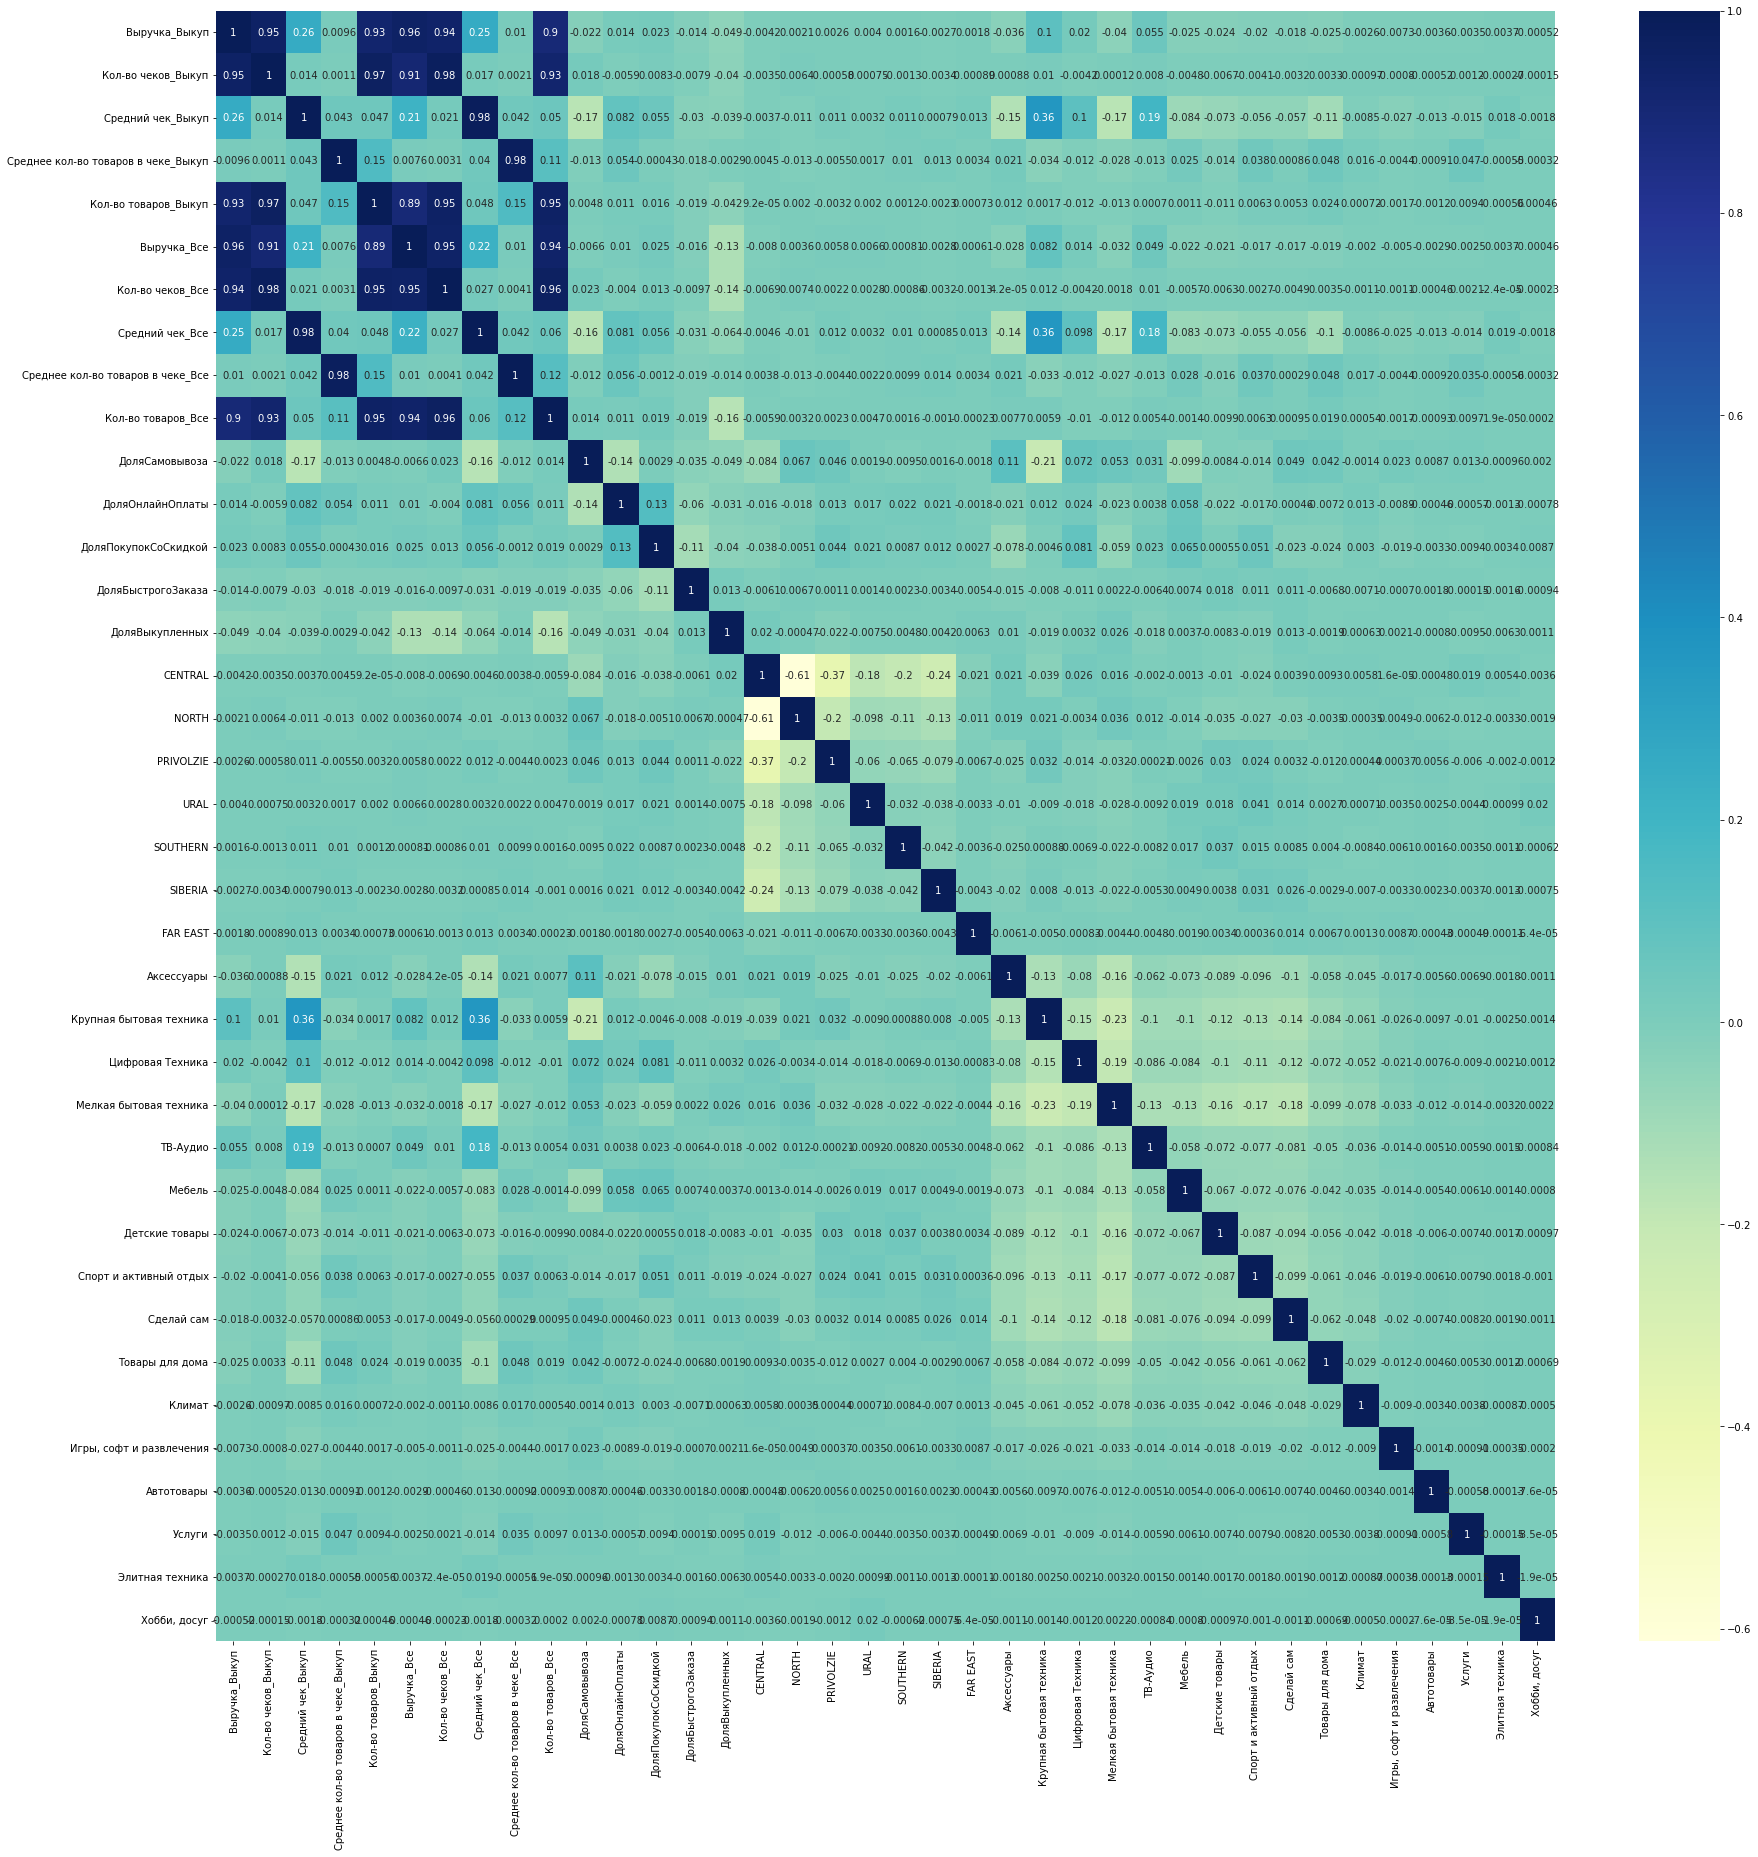

In [248]:
fig = plt.figure(figsize = (30, 30))
sns.heatmap(vitrinaTN.corr(), annot=True, cmap = 'YlGnBu');

In [249]:
corr = vitrinaTN.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Ксения\AppData\Local\Temp\ipykernel_12116\1848104560.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Выручка_Выкуп,Кол-во чеков_Выкуп,Средний чек_Выкуп,Среднее кол-во товаров в чеке_Выкуп,Кол-во товаров_Выкуп,Выручка_Все,Кол-во чеков_Все,Средний чек_Все,Среднее кол-во товаров в чеке_Все,Кол-во товаров_Все,ДоляСамовывоза,ДоляОнлайнОплаты,ДоляПокупокСоСкидкой,ДоляБыстрогоЗаказа,ДоляВыкупленных,CENTRAL,NORTH,PRIVOLZIE,URAL,SOUTHERN,SIBERIA,FAR EAST,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Товары для дома,Климат,"Игры, софт и развлечения",Автотовары,Услуги,Элитная техника,"Хобби, досуг"
Выручка_Выкуп,1.00,0.21,0.98,-0.02,0.20,0.97,0.16,0.97,-0.01,0.18,-0.24,0.09,0.12,-0.02,-0.08,-0.01,-0.01,0.02,0.00,0.02,0.00,0.01,-0.20,0.42,0.17,-0.15,0.19,-0.07,-0.04,-0.05,0.00,-0.14,0.03,-0.05,-0.02,-0.02,0.01,-0.00
Кол-во чеков_Выкуп,0.21,1.00,0.04,0.09,0.64,0.21,0.69,0.04,0.11,0.54,0.05,0.01,0.11,0.01,-0.18,-0.01,0.02,0.00,-0.01,-0.00,-0.01,-0.01,0.10,0.07,0.04,0.03,0.08,0.03,0.02,0.05,0.06,0.10,0.04,0.02,0.00,0.02,-0.00,-0.00
Средний чек_Выкуп,0.98,0.04,1.00,-0.04,0.09,0.95,0.05,0.99,-0.03,0.09,-0.27,0.09,0.10,-0.03,-0.04,-0.01,-0.02,0.02,0.01,0.02,0.01,0.01,-0.23,0.42,0.17,-0.16,0.18,-0.07,-0.04,-0.06,-0.01,-0.16,0.02,-0.05,-0.02,-0.03,0.01,-0.00
Среднее кол-во товаров в чеке_Выкуп,-0.02,0.09,-0.04,1.00,0.41,-0.01,0.08,-0.03,0.96,0.34,-0.01,0.06,0.02,-0.03,-0.04,0.01,-0.01,-0.00,0.01,0.02,0.01,0.01,0.04,-0.05,-0.02,-0.05,-0.01,0.06,-0.02,0.10,0.02,0.09,0.01,-0.00,-0.00,0.02,-0.00,-0.00
Кол-во товаров_Выкуп,0.20,0.64,0.09,0.41,1.00,0.20,0.45,0.09,0.41,0.83,-0.03,0.05,0.11,-0.05,-0.13,0.01,-0.01,-0.01,-0.00,0.01,-0.01,0.00,0.18,0.03,0.02,-0.02,0.05,0.06,-0.00,0.06,0.09,0.16,0.04,0.01,0.00,0.02,-0.00,0.01
Выручка_Все,0.97,0.21,0.95,-0.01,0.20,1.00,0.31,0.96,0.01,0.29,-0.23,0.09,0.13,-0.02,-0.26,-0.01,-0.01,0.02,0.00,0.02,0.00,0.01,-0.20,0.41,0.17,-0.15,0.18,-0.07,-0.03,-0.04,0.00,-0.13,0.03,-0.04,-0.02,-0.02,0.01,-0.00
Кол-во чеков_Все,0.16,0.69,0.05,0.08,0.45,0.31,1.00,0.07,0.11,0.77,0.06,0.03,0.10,0.00,-0.79,-0.02,0.01,0.02,0.00,0.00,-0.00,-0.01,0.06,0.06,0.03,0.00,0.07,0.02,0.02,0.05,0.04,0.07,0.03,0.01,0.00,0.02,0.00,-0.00
Средний чек_Все,0.97,0.04,0.99,-0.03,0.09,0.96,0.07,1.00,-0.02,0.11,-0.27,0.09,0.10,-0.03,-0.07,-0.01,-0.02,0.02,0.01,0.02,0.01,0.01,-0.22,0.42,0.17,-0.16,0.18,-0.07,-0.04,-0.05,-0.01,-0.16,0.02,-0.05,-0.02,-0.03,0.01,-0.00
Среднее кол-во товаров в чеке_Все,-0.01,0.11,-0.03,0.96,0.41,0.01,0.11,-0.02,1.00,0.36,-0.01,0.06,0.03,-0.03,-0.09,0.00,-0.02,-0.00,0.01,0.02,0.01,0.01,0.05,-0.05,-0.01,-0.04,-0.00,0.06,-0.02,0.10,0.02,0.10,0.02,0.00,-0.00,0.02,-0.00,-0.00
Кол-во товаров_Все,0.18,0.54,0.09,0.34,0.83,0.29,0.77,0.11,0.36,1.00,-0.01,0.06,0.11,-0.04,-0.60,0.00,-0.01,0.00,0.00,0.01,-0.01,0.00,0.15,0.04,0.02,-0.03,0.05,0.05,0.01,0.06,0.07,0.14,0.04,0.01,0.00,0.02,0.00,0.00


In [250]:
# remove outliers
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [255]:
%%time
outliers = IsolationForest(n_estimators=20, random_state=0).fit_predict(vitrinaTN.values)  # fit 3 trees  
outliers = (outliers+1)//2

print('% of outliers with Isolation forest:', 1 - (np.sum(outliers) / vitrinaTN.shape[0]))

% of outliers with Isolation forest: 0.04434014973740086
CPU times: total: 2.38 s
Wall time: 2.53 s


In [256]:
vitrinaTN = vitrinaTN.loc[np.array(vitrinaTN.index)[outliers == 1]]

In [257]:
# Удалим сильно коррелированные показатели
vitrinaTN_1 = vitrinaTN.drop(['Средний чек_Выкуп', 'Выручка_Все', 'Средний чек_Все', 'Среднее кол-во товаров в чеке_Все', 'Кол-во товаров_Все', 'Кол-во чеков_Все'],
             axis=1)

In [258]:
vitrinaTN_1.to_csv('vitrinaTN_1.csv', index=True)

In [259]:
vitrinaTN_1.shape

(85522, 32)

In [260]:
vitrinaTN_1

,Выручка_Выкуп,Кол-во чеков_Выкуп,Среднее кол-во товаров в чеке_Выкуп,Кол-во товаров_Выкуп,ДоляСамовывоза,ДоляОнлайнОплаты,ДоляПокупокСоСкидкой,ДоляБыстрогоЗаказа,ДоляВыкупленных,CENTRAL,NORTH,PRIVOLZIE,URAL,SOUTHERN,SIBERIA,FAR EAST,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Товары для дома,Климат,"Игры, софт и развлечения",Автотовары,Услуги,Элитная техника,"Хобби, досуг"
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55575449-54535553535073,2420.0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55574954-53565052504871,8999.0,1,1.0,1.0,0.0,0.0,1.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55575049-51505248534972,1790.0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55574954-53495654564877,1420.0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55575054-53544849485671,249.0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55575054-49505554565675,1390.0,1,1.0,1.0,1.0,0.0,0.0,0.0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55575055-51565055494871,19990.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55575053-55485548545470,11370.0,1,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [261]:
# Нормализация данных
from sklearn import preprocessing

In [262]:
# define scaler
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(vitrinaTN_1)

In [263]:
# K-means
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS
from scipy.spatial.distance import cdist

In [264]:
%%time
# k means determine k
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
    print('{} / {}'.format(k,K[-1]))

1 / 13
2 / 13
3 / 13
4 / 13
5 / 13
6 / 13
7 / 13
8 / 13
9 / 13
10 / 13
11 / 13
12 / 13
13 / 13
CPU times: total: 3min 25s
Wall time: 1min 6s


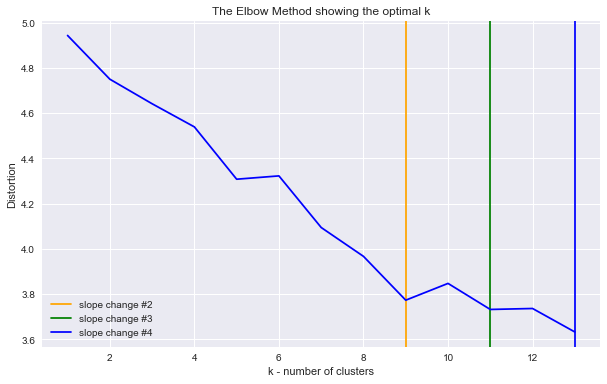

In [274]:
# Plot the elbow
plt.figure(figsize=(10, 6))
plt.axvline(9, 0, 1, label='slope change #2', color='orange')
plt.axvline(11, 0, 1, label='slope change #3', color='green')
plt.axvline(13, 0, 1, label='slope change #4', color='blue')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

In [208]:
# Метод локтя показывает нам, что оптимальное кол-во кластеров равно 9,11 либо 13. Проанализируем с помощью различных индексов качества и выберем наиболее подходящее число кластеров.

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
%matplotlib inline

In [161]:
# Davies-Boulding Index
# Davies-Bouldin index is a validation metric that is often used in order to evaluate the optimal number of clusters to use. It is defined as a ratio between the cluster scatter and the cluster’s separation and a lower value will mean that the clustering is better.
# https://python-bloggers.com/2021/06/davies-bouldin-index-for-k-means-clustering-evaluation-in-python/

In [267]:
results_db_kmeans = {}
for i in range(2, 14):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans.update({i: db_index})

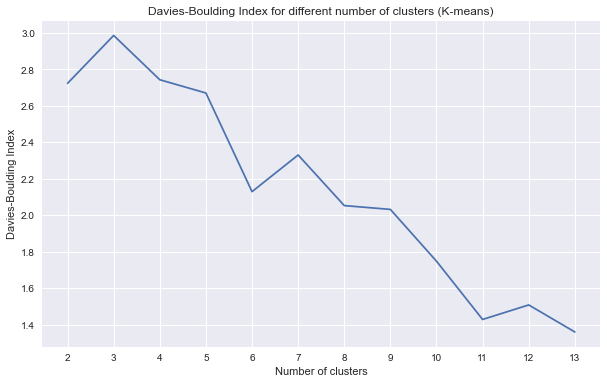

In [268]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()))

plt.xticks(np.arange(2, 14, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (K-means)')
plt.show()

In [ ]:
# Данный индекс показывает, что оптимальное число кластеров равно 11 или 13

In [ ]:
# Silhouette Score
#The Silhouette Coefficient tells us how well-assigned each individual point is. If S(i) is close to 0, it is right at the inflection point between two clusters. If it is closer to -1, then we would have been better off assigning it to the other cluster. If S(i) is close to 1, then the point is well-assigned and can be interpreted as belonging to an ‘appropriate’ cluster.

In [270]:
results_sil_kmeans = {}
for i in range(2, 14):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    sil_score = silhouette_score(X, labels)
    results_sil_kmeans.update({i: sil_score})

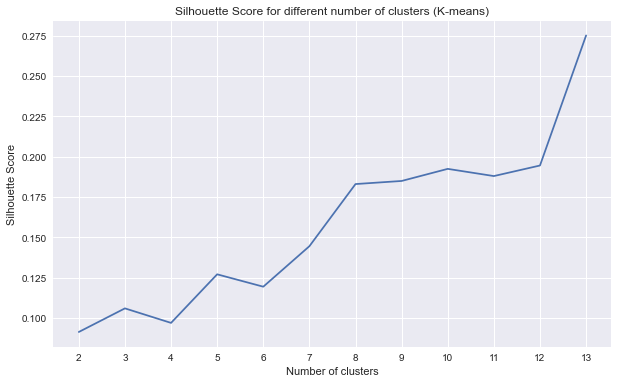

In [271]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 14, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (K-means)')
plt.show()

In [ ]:
# Индекс силуета показывает, что оптимальное кол-во кластеров равно 13

In [ ]:
# Calinski-Harabasz Index
#Calinski-Harabasz Index is also known as the Variance Ratio Criterion. The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The higher the Index, the better the performance.
#Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value. We need to choose that solution which gives a peak or at least an abrupt elbow on the line plot of CH indices. On the other hand, if the line is smooth (horizontal or ascending or descending) then there is no such reason to prefer one solution over others.

In [272]:
results_ch_kmeans = {}
for i in range(2, 14):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_kmeans.update({i: ch_score})

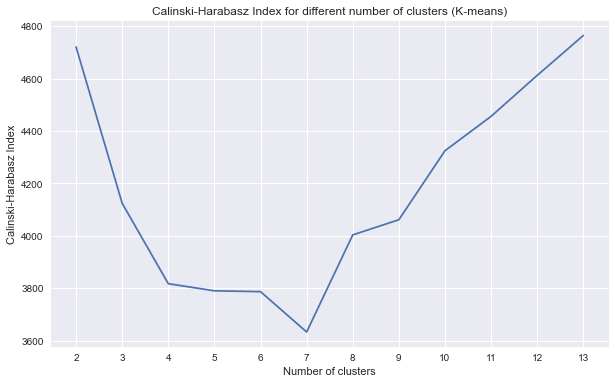

In [273]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_kmeans.keys()), list(results_ch_kmeans.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 14, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (K-means)')
plt.show()

In [166]:
# индекс данный показывает, что оптимальное кол-во кластеров равно 2 либо 13

In [275]:
from sklearn.decomposition import PCA, TruncatedSVD

In [276]:
Y_pca = PCA(n_components=2).fit_transform(X);
Y_svd = TruncatedSVD(n_components=2).fit_transform(X);

In [277]:
K = 9
kmeanModel = KMeans(n_clusters=K).fit(X) 

In [278]:
# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels = kmeanModel.labels_

vitrinaTN['Labels'] = kmeanModel.labels_

df_1 = vitrinaTN[(vitrinaTN['Labels'] == 0)]
df_2 = vitrinaTN[(vitrinaTN['Labels'] == 1)]
df_3 = vitrinaTN[(vitrinaTN['Labels'] == 2)]
df_4 = vitrinaTN[(vitrinaTN['Labels'] == 3)]
df_5 = vitrinaTN[(vitrinaTN['Labels'] == 4)]
df_6 = vitrinaTN[(vitrinaTN['Labels'] == 5)]
df_7 = vitrinaTN[(vitrinaTN['Labels'] == 6)]
df_8 = vitrinaTN[(vitrinaTN['Labels'] == 7)]
df_9 = vitrinaTN[(vitrinaTN['Labels'] == 8)]
df_1_9 = vitrinaTN[(vitrinaTN['Labels'] != 9)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('df: ', len(vitrinaTN))

Segment 1:  8111
Segment 2:  8005
Segment 3:  6660
Segment 4:  33137
Segment 5:  7573
Segment 6:  1
Segment 7:  13410
Segment 8:  4022
Segment 9:  4603
df:  85522


<AxesSubplot:ylabel='Labels'>

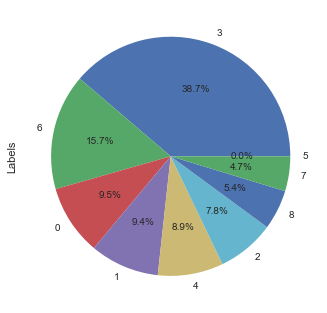

In [279]:
df_1_9['Labels'].value_counts().plot(kind='pie', label='Labels', autopct='%1.1f%%')

In [280]:
K = 11
kmeanModel = KMeans(n_clusters=K).fit(X)

In [281]:
# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

kmeanModel = KMeans(n_clusters=K).fit(X) # BESTter label for each data point
labels = kmeanModel.labels_

vitrinaTN['Labels'] = kmeanModel.labels_

df_1 = vitrinaTN[(vitrinaTN['Labels'] == 0)]
df_2 = vitrinaTN[(vitrinaTN['Labels'] == 1)]
df_3 = vitrinaTN[(vitrinaTN['Labels'] == 2)]
df_4 = vitrinaTN[(vitrinaTN['Labels'] == 3)]
df_5 = vitrinaTN[(vitrinaTN['Labels'] == 4)]
df_6 = vitrinaTN[(vitrinaTN['Labels'] == 5)]
df_7 = vitrinaTN[(vitrinaTN['Labels'] == 6)]
df_8 = vitrinaTN[(vitrinaTN['Labels'] == 7)]
df_9 = vitrinaTN[(vitrinaTN['Labels'] == 8)]
df_10 = vitrinaTN[(vitrinaTN['Labels'] == 9)]
df_11 = vitrinaTN[(vitrinaTN['Labels'] == 10)]
df_1_11 = vitrinaTN[(vitrinaTN['Labels'] != 11)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))
print('Segment 11: ', len(df_11))
print('df: ', len(vitrinaTN))

Segment 1:  38305
Segment 2:  4604
Segment 3:  12975
Segment 4:  3619
Segment 5:  32
Segment 6:  2235
Segment 7:  1
Segment 8:  7919
Segment 9:  6416
Segment 10:  47
Segment 11:  9369
df:  85522


<AxesSubplot:ylabel='Labels'>

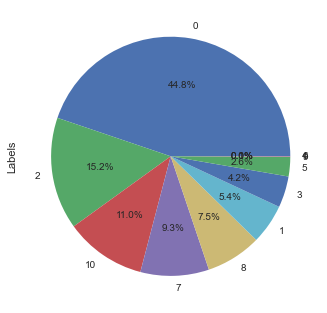

In [282]:
df_1_11['Labels'].value_counts().plot(kind='pie', label='Labels', autopct='%1.1f%%')

In [284]:
K = 13
kmeanModel = KMeans(n_clusters=K).fit(X) # BES1

In [285]:
# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# clusK = 10
#kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
kmeanModel = KMeans(n_clusters=K).fit(X) # BESTter label for each data point
labels = kmeanModel.labels_

vitrinaTN['Labels'] = kmeanModel.labels_

df_1 = vitrinaTN[(vitrinaTN['Labels'] == 0)]
df_2 = vitrinaTN[(vitrinaTN['Labels'] == 1)]
df_3 = vitrinaTN[(vitrinaTN['Labels'] == 2)]
df_4 = vitrinaTN[(vitrinaTN['Labels'] == 3)]
df_5 = vitrinaTN[(vitrinaTN['Labels'] == 4)]
df_6 = vitrinaTN[(vitrinaTN['Labels'] == 5)]
df_7 = vitrinaTN[(vitrinaTN['Labels'] == 6)]
df_8 = vitrinaTN[(vitrinaTN['Labels'] == 7)]
df_9 = vitrinaTN[(vitrinaTN['Labels'] == 8)]
df_10 = vitrinaTN[(vitrinaTN['Labels'] == 9)]
df_11 = vitrinaTN[(vitrinaTN['Labels'] == 10)]
df_12 = vitrinaTN[(vitrinaTN['Labels'] == 11)]
df_13 = vitrinaTN[(vitrinaTN['Labels'] == 12)]
df_1_13 = vitrinaTN[(vitrinaTN['Labels'] != 13)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))
print('Segment 11: ', len(df_11))
print('Segment 12: ', len(df_12))
print('Segment 13: ', len(df_13))
print('df: ', len(vitrinaTN))

Segment 1:  3480
Segment 2:  15547
Segment 3:  4436
Segment 4:  7919
Segment 5:  12164
Segment 6:  7288
Segment 7:  17594
Segment 8:  322
Segment 9:  1704
Segment 10:  3976
Segment 11:  4580
Segment 12:  6509
Segment 13:  3
df:  85522


<AxesSubplot:ylabel='Разделение на кластеры'>

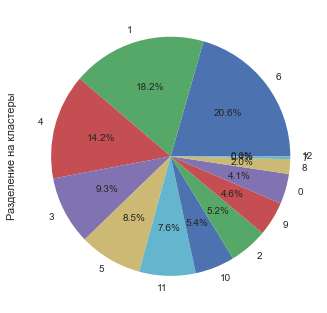

In [300]:
df_1_13['Labels'].value_counts().plot(kind='pie', label='Разделение на кластеры', autopct='%1.1f%%')

In [ ]:
# Лучше всего разделение выглядит при 13 кластерах. Выберем это значение

In [288]:
df_1_13.to_csv('df_segment_1_13.csv')

In [291]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
cols = df_1_13.columns 

#print the columns
for column in cols:
    #print("\'",column,"\'")
    print("\'",sep="",end=""); print(column,sep="",end=""); print("\'",sep="")

'Выручка_Выкуп'
'Кол-во чеков_Выкуп'
'Средний чек_Выкуп'
'Среднее кол-во товаров в чеке_Выкуп'
'Кол-во товаров_Выкуп'
'Выручка_Все'
'Кол-во чеков_Все'
'Средний чек_Все'
'Среднее кол-во товаров в чеке_Все'
'Кол-во товаров_Все'
'ДоляСамовывоза'
'ДоляОнлайнОплаты'
'ДоляПокупокСоСкидкой'
'ДоляБыстрогоЗаказа'
'ДоляВыкупленных'
'CENTRAL'
'NORTH'
'PRIVOLZIE'
'URAL'
'SOUTHERN'
'SIBERIA'
'FAR EAST'
'Аксессуары'
'Крупная бытовая техника'
'Цифровая Техника'
'Мелкая бытовая техника'
'ТВ-Аудио'
'Мебель'
'Детские товары'
'Спорт и активный отдых'
'Сделай сам'
'Товары для дома'
'Климат'
'Игры, софт и развлечения'
'Автотовары'
'Услуги'
'Элитная техника'
'Хобби, досуг'
'Labels'


In [292]:
# Напишем агрегированную функцию
agg_func_claster = {'Выручка_Выкуп': ['sum'],
            'Кол-во чеков_Выкуп': ['sum'],
            'Средний чек_Выкуп': ['mean'],
            'Среднее кол-во товаров в чеке_Выкуп': ['mean'],
            'Кол-во товаров_Выкуп': ['sum'],
            'Выручка_Все': ['sum'],
            'Кол-во чеков_Все': ['sum'],
            'Средний чек_Все': ['mean'],
            'Среднее кол-во товаров в чеке_Все': ['mean'],
            'Кол-во товаров_Все': ['sum'],
            'ДоляСамовывоза':['mean'],
            'ДоляОнлайнОплаты':['mean'],
            'ДоляПокупокСоСкидкой':['mean'],
            'ДоляБыстрогоЗаказа':['mean'],
            'ДоляВыкупленных':['mean'],
'CENTRAL': ['sum'],
'NORTH': ['sum'],
'PRIVOLZIE': ['sum'],
'URAL': ['sum'],
'SOUTHERN': ['sum'],
'SIBERIA': ['sum'],
'FAR EAST': ['sum'],
'Аксессуары': ['sum'],
'Крупная бытовая техника': ['sum'],
'Цифровая Техника': ['sum'],
'Мелкая бытовая техника': ['sum'],
'ТВ-Аудио': ['sum'],
'Мебель': ['sum'],
'Детские товары': ['sum'],
'Спорт и активный отдых': ['sum'],
'Сделай сам': ['sum'],
'Товары для дома': ['sum'],
'Климат': ['sum'],
'Игры, софт и развлечения': ['sum'],
'Автотовары': ['sum'],
'Услуги': ['sum'],
'Элитная техника': ['sum'],
'Хобби, досуг': ['sum'],
'Total': ['sum']                    
}

In [293]:
clasterization = copy.deepcopy(df_1_13)

In [294]:
clasterization['Total']=clasterization[['CENTRAL','NORTH','PRIVOLZIE','URAL','SOUTHERN','SIBERIA','FAR EAST']].sum(axis=1)

In [295]:
clasterization = clasterization.groupby(['Labels']).agg(agg_func_claster).round(2)

In [296]:
clasterization

,Выручка_Выкуп,Кол-во чеков_Выкуп,Средний чек_Выкуп,Среднее кол-во товаров в чеке_Выкуп,Кол-во товаров_Выкуп,Выручка_Все,Кол-во чеков_Все,Средний чек_Все,Среднее кол-во товаров в чеке_Все,Кол-во товаров_Все,ДоляСамовывоза,ДоляОнлайнОплаты,ДоляПокупокСоСкидкой,ДоляБыстрогоЗаказа,ДоляВыкупленных,CENTRAL,NORTH,PRIVOLZIE,URAL,SOUTHERN,SIBERIA,FAR EAST,Аксессуары,Крупная бытовая техника,Цифровая Техника,Мелкая бытовая техника,ТВ-Аудио,Мебель,Детские товары,Спорт и активный отдых,Сделай сам,Товары для дома,Климат,"Игры, софт и развлечения",Автотовары,Услуги,Элитная техника,"Хобби, досуг",Total
,sum,sum,mean,mean,sum,sum,sum,mean,mean,sum,mean,mean,mean,mean,mean,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11077884.0,4045,2758.80,1.12,6145.0,12985611.0,4450,2854.88,1.12,6644.0,0.83,0.04,0.09,0.06,0.96,1991.50,824.0,308.5,101.0,104.00,147.0,4.0,55.66,21.10,19.30,151.04,9.35,30.10,17.19,19.40,33.85,3116.67,3.17,0.17,0.00,3.00,0.0,0.0,3480.0
1,125169160.0,16765,7661.81,1.02,19465.0,125781358.0,16873,7661.55,1.02,19575.0,0.86,0.05,0.14,0.06,1.00,8927.17,3984.0,1360.5,312.0,385.33,575.0,3.0,6429.91,30.58,8574.01,246.41,72.43,15.62,24.44,20.42,31.53,12.68,10.92,1.70,37.87,38.00,0.0,0.5,15547.0
2,43215747.0,5042,8948.81,1.00,5431.0,101252197.0,10909,9550.12,1.01,12318.0,0.81,0.06,0.15,0.06,0.47,2344.00,1231.0,500.0,99.0,78.00,184.0,0.0,480.93,1117.62,758.98,1502.36,36.73,18.07,126.53,203.67,147.02,25.09,5.67,0.50,4.00,8.83,0.0,0.0,4436.0
3,53455755.0,8549,6400.66,1.02,10373.0,56918819.0,9052,6427.85,1.02,10924.0,0.81,0.04,0.10,0.08,0.97,4423.50,1639.5,878.0,206.0,283.00,479.0,10.0,24.35,19.55,11.82,55.46,5.60,5.76,12.14,13.65,7760.98,4.99,4.25,0.20,0.00,0.25,0.0,0.0,7919.0
4,237197910.0,13128,18377.68,1.00,14449.0,240570977.0,13279,18334.81,1.00,14613.0,0.50,0.05,0.12,0.07,1.00,6109.00,3219.5,1549.5,283.0,384.00,618.0,1.0,67.76,11766.19,40.30,151.96,33.29,13.25,15.28,11.67,21.48,27.91,13.00,1.17,0.25,0.50,0.0,0.0,12164.0
5,52818775.0,7942,6912.76,1.07,9840.0,57231251.0,8612,6931.69,1.07,10647.0,0.71,0.04,0.19,0.08,0.96,3680.00,1525.0,958.0,345.0,277.00,500.0,3.0,10.33,7.67,9.07,45.58,5.48,12.02,20.93,7154.21,14.01,4.26,3.19,0.25,1.00,0.00,0.0,0.0,7288.0
6,89843042.0,18143,5019.45,1.01,19318.0,89968158.0,18169,5019.30,1.01,19344.0,0.78,0.04,0.09,0.08,1.00,9746.50,4808.0,1550.5,340.0,446.00,699.0,4.0,29.05,22.20,8.28,17474.10,14.27,13.62,7.62,5.33,3.28,14.02,2.23,0.00,0.00,0.00,0.0,0.0,17594.0
7,1306970.0,357,3621.60,1.01,403.0,1628934.0,388,3808.73,1.01,440.0,0.90,0.02,0.02,0.07,0.96,174.00,90.0,34.0,6.0,5.00,12.0,1.0,3.33,1.50,1.67,2.00,1.00,0.50,0.00,0.50,0.00,0.00,0.00,311.33,0.00,0.17,0.0,0.0,322.0


In [297]:
clasterization.to_csv('clasterization_13.csv')